# Berkeley Professional Certificate in ML and AI : 2025 Capstone Project 
# Detection And Prevention of Fradulent Phone Numbers

#### How can we detect and prevent fraudulent phone numbers used during user registration or profile updates (on organizations Identity Access Systems) to exploit SMS-based systems for monetary gain?  
This project is all about trying to predict and also identify Fraudulent Data from the Dataset. The Dataset used is a deidentified CSV dataset file Fraud_PhoneAnSMS_Dataset.CSV.

As a possible fraudulent record a upstream system flags every record entry.This project is modeled with both Supervised and Unsupervised solutuions.

Supervised Models:
Logistic Regression, Random Forest, XGBoost, LightGBM, KNN, Naive Bayes:GaussianNB

Unsupervised Models:
IsolationForest, One-Class SVM, LOF Local Outlier Factor, KMeans

We will run the visualizations at varoius stages. As a ultimate goal we will also identify fradulent phone numbers used.  We will derive these phones numbers running both the kind of models and merge the records to identify them.

In [2]:
##################################################################################################################
# We get in all the imports and libraries here.
# As this project targets both supervised and unsupervided models we will have a larger library set in the 
# declaration imports below
##################################################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

############################
# For the Supervised
############################

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, precision_recall_curve)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

############################
# For the unsupervised
############################

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve

import shap
import warnings
warnings.filterwarnings("ignore")

## 1. Load and Explore Dataset

In [3]:
###############################################################################
# Load and Peek at the Data : 1 File Fraud_PhoneAnSMS_Dataset.csv
# This is the Input folder from where we will read this file into a Dataframe
# Within the Data Folder we will have a Output Folder named FraudPhoneNumbers 
# where the Fraudulent Phone numbers will be pushed after Processing 
###############################################################################
df = pd.read_csv("..\\Data\\Fraud_PhoneAnSMS_Dataset.csv")
us_df = df.copy()
print(df.shape)
print("----------------------")
print(df.head)
print("----------------------")
print(df.dtypes)

(50000, 20)
----------------------
<bound method NDFrame.head of                                     user_id                          email  \
0      28c00a95-073c-4b4b-b737-f06a11f731a0                grose@yahoo.com   
1      bec4ee08-70ec-49c4-924b-035f24b9be69             tcoleman@yahoo.com   
2      7118e364-7709-4749-927e-ecfaa79ac9aa           robynbell@ingram.net   
3      15a70b2d-d703-4652-b857-d87a04d999e6            owilliams@yahoo.com   
4      5c909472-17dc-4c69-a920-69b39dcb9cc0               vgibbs@blake.com   
...                                     ...                            ...   
49995  16a36d0d-75cd-48b2-9131-32de4ac92390          trichardson@yahoo.com   
49996  0d6741d9-db60-41a7-a209-cff3e0c4483e             vjackson@gmail.com   
49997  0736aaac-7b67-4fc5-a778-ed43025420e7  anthonybowers@blankenship.com   
49998  98cf1188-06d2-4913-a117-3719b023a0ea         derrickowens@gmail.com   
49999  9f79be9f-edb2-4061-9d3d-7095fc22b51f            vwaller@hotmail.com   

## 2. Exploratory Data Analysis

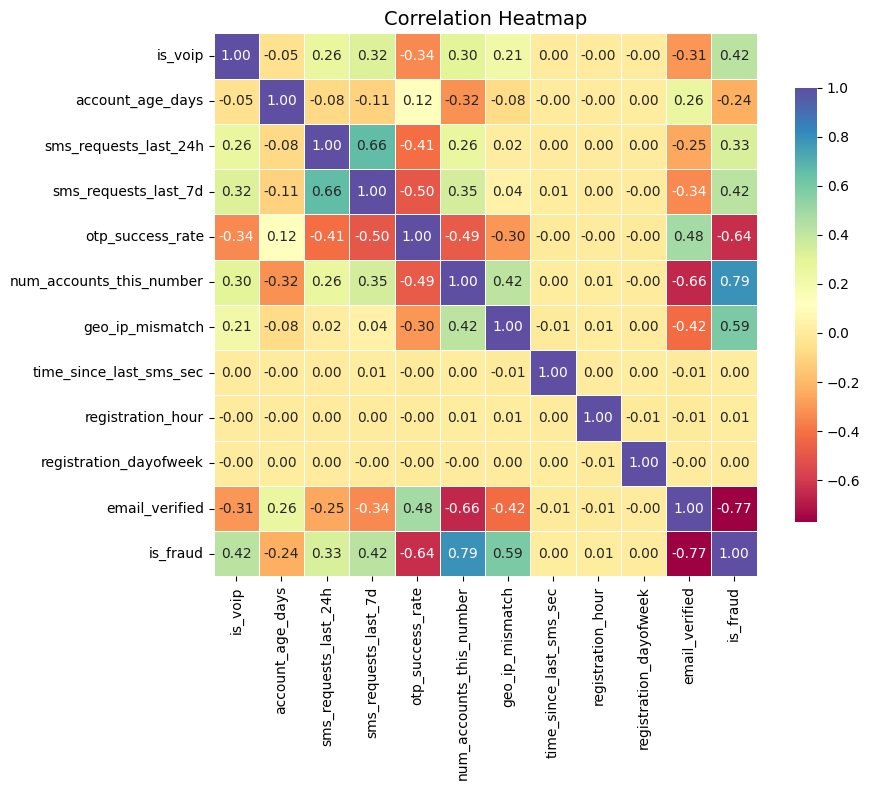

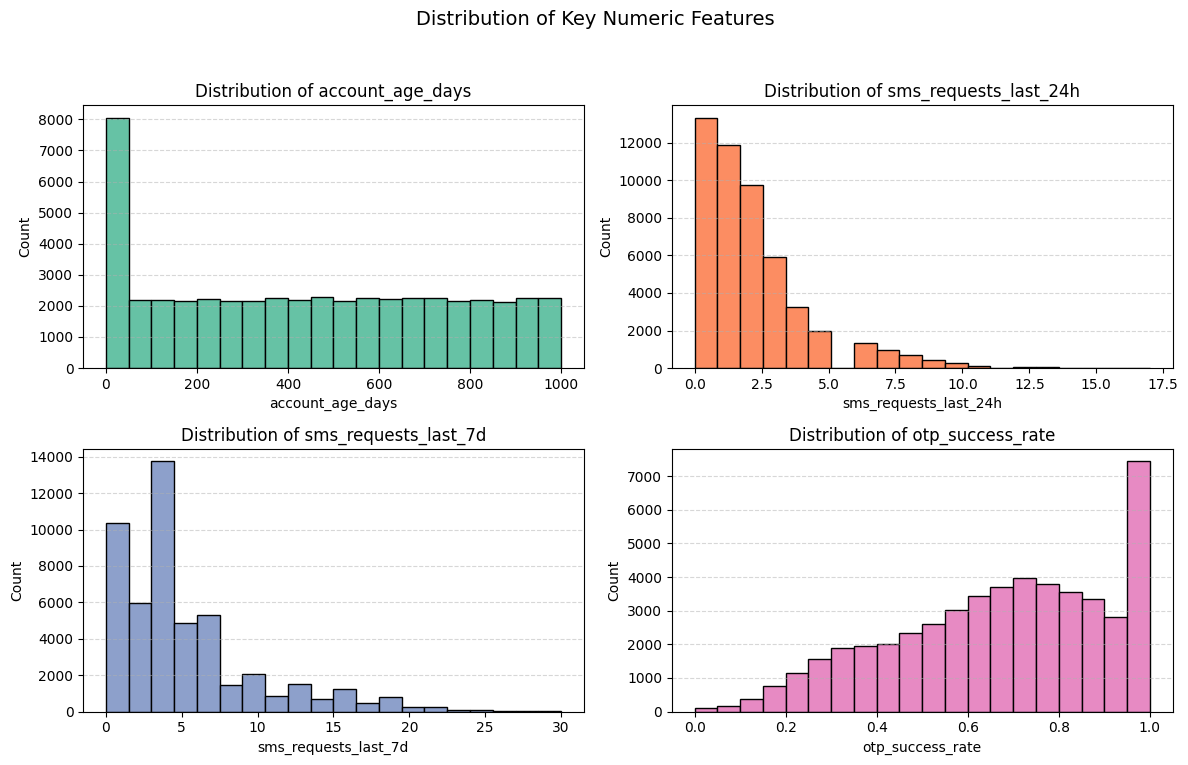

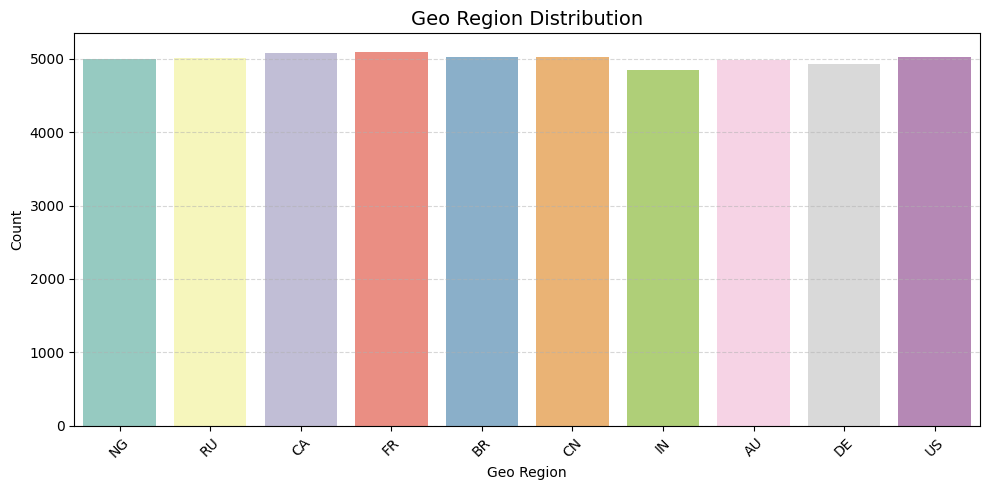

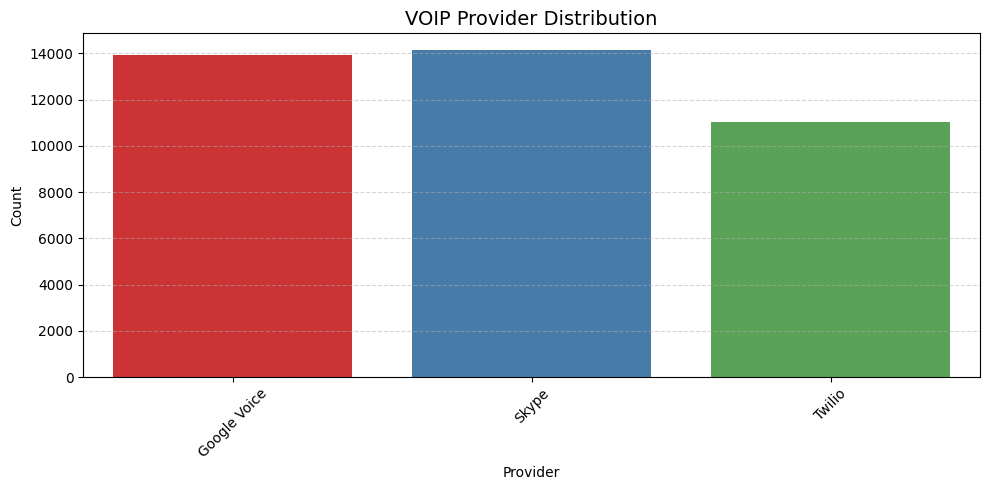

In [4]:
#################################################################################################################
# The Exploratory Data Analysis visuallizations give us some insight into the Data while we use the key features 
# to anlalyze. Several Plots have been documented here
# 1. Corelation Heatmap
# 2. Distribution of key Numeric Features from the data
# 3. Geo Distribution and VOIP distributions
# 4. Violin Plots of Numeric Features by Fraud Label
# 5. Kernel Density Estimate(KDE) Distributions of Features by Fraud Status
# 6. Violin pLots by Device Type used
# 7. Violin Plots be Goe Region
# These plots specify many interesting thing about the data
#################################################################################################################
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    annot=True,
    cmap='Spectral',
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\EDS-Correlation_Heatmap.png", dpi=300)
plt.show()

numeric_cols = ['account_age_days', 'sms_requests_last_24h', 'sms_requests_last_7d', 'otp_success_rate']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    plt.hist(df[col], bins=20, color=colors[i], edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle("Distribution of Key Numeric Features", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("..\\GraphPlots\\EDS-Key_Numeric_Features_DistriBution.png", dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='geo_region', palette="Set3")
plt.title("Geo Region Distribution", fontsize=14)
plt.xlabel("Geo Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\EDS-Geo_Region_Disrtibution.png", dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='voip_provider', palette="Set1")
plt.title("VOIP Provider Distribution", fontsize=14)
plt.xlabel("Provider")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\EDS-VOIP_Provider_Disrtibution.png", dpi=300)
plt.show()

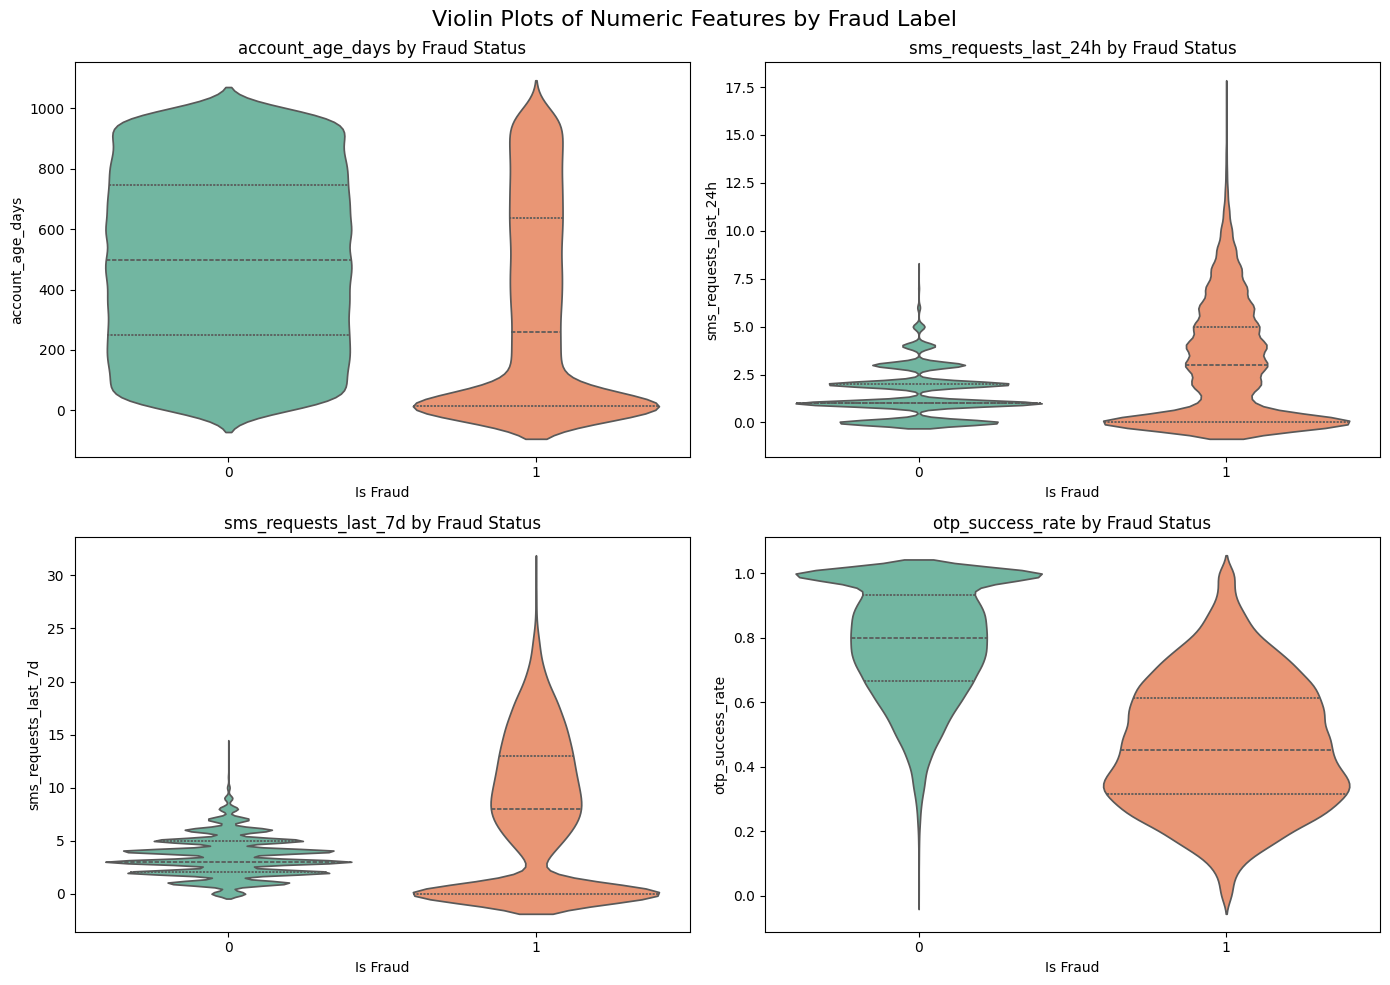

In [5]:
###########################################################################################################
# EDS: Violin Plots of Numeric Features by Fraud Label
###########################################################################################################
numeric_cols = ['account_age_days', 'sms_requests_last_24h', 'sms_requests_last_7d', 'otp_success_rate']

plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(data=df, x='is_fraud', y=col, palette="Set2", inner="quartile")
    plt.title(f"{col} by Fraud Status")
    plt.xlabel("Is Fraud")
    plt.ylabel(col)

plt.suptitle("Violin Plots of Numeric Features by Fraud Label", fontsize=16)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\EDS-Violin_Numeric_Features_By_Fraud_Label.png", dpi=300)
plt.show()

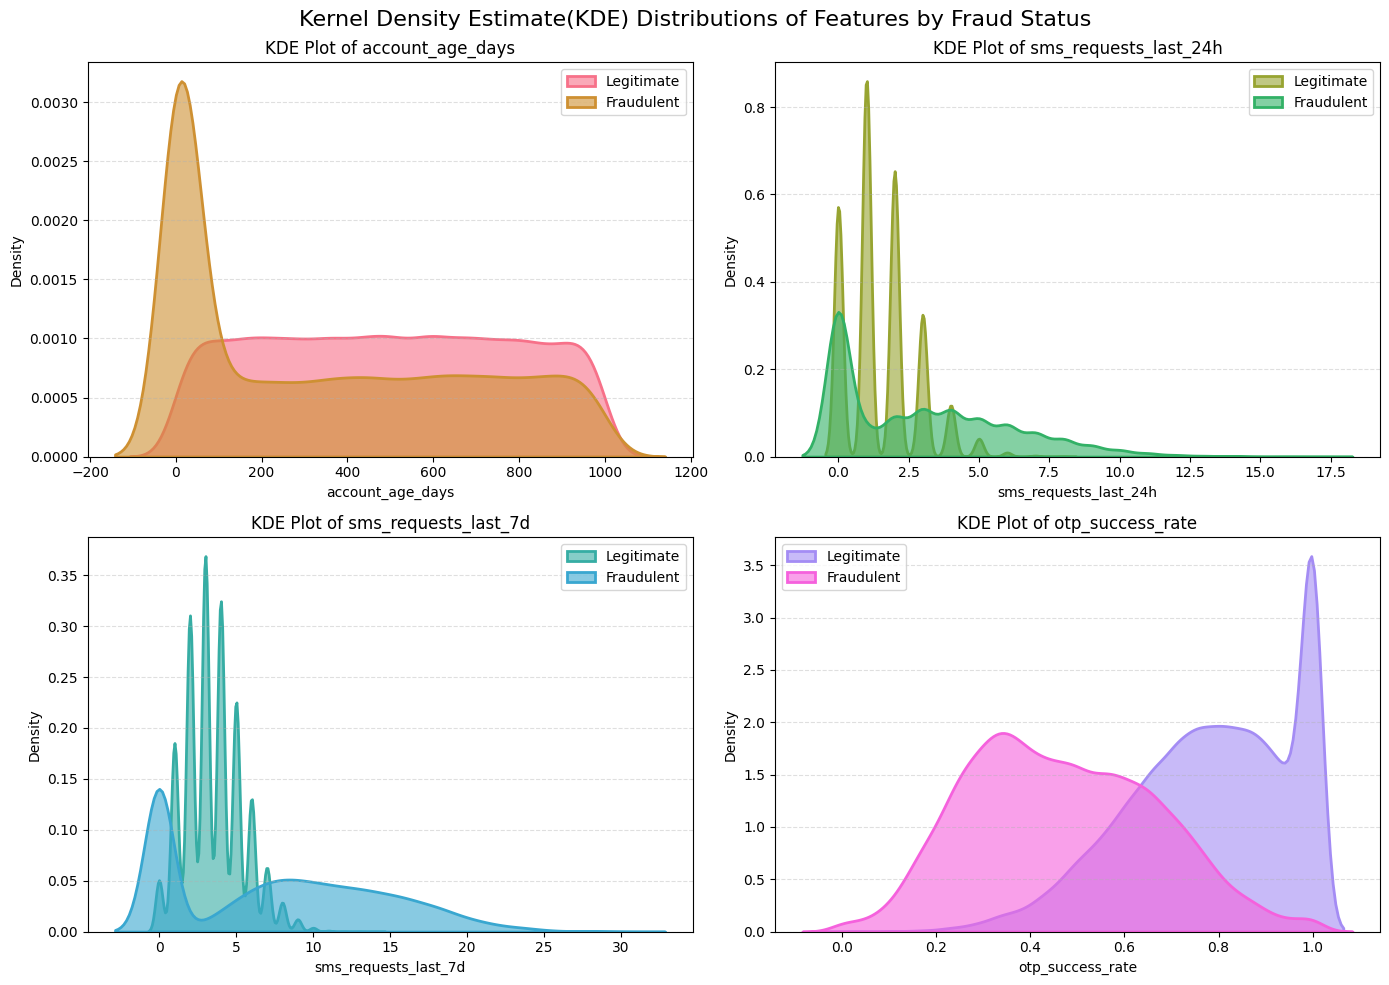

In [6]:
##################################################################################################################
# EDS: Kernel Density Estimate(KDE) Distributions of Features by Fraud Status
# By Def it is a smooth, continuous curve that visualizes the distribution of a dataset, especially for continuous variables
# What the plot shows is...
# Probability density: It estimates how likely values are to occur within a range.
# Shape of distribution: Reveals peaks, skewness, and spread more clearly than histograms.
# Multiple distributions: You can overlay KDE plots to compare different groups.
##################################################################################################################
# Define feature list
numeric_cols = ['account_age_days', 'sms_requests_last_24h', 'sms_requests_last_7d', 'otp_success_rate']

# Generate a longer palette (2 colors per feature)
color_palette = sns.color_palette("husl", len(numeric_cols) * 2)  # or try "tab10", "Paired", etc.

plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols):
    legit_color = color_palette[i * 2]
    fraud_color = color_palette[i * 2 + 1]
    
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(
        data=df[df['is_fraud'] == 0], 
        x=col, 
        label='Legitimate', 
        fill=True, 
        alpha=0.6, 
        linewidth=2,
        color=legit_color
    )
    sns.kdeplot(
        data=df[df['is_fraud'] == 1], 
        x=col, 
        label='Fraudulent', 
        fill=True, 
        alpha=0.6, 
        linewidth=2,
        color=fraud_color
    )
    plt.title(f"KDE Plot of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.suptitle("Kernel Density Estimate(KDE) Distributions of Features by Fraud Status", fontsize=16)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\EDS-KDE_Distribution_Of_FeaturesByFraud_Status.png", dpi=300)
plt.show()

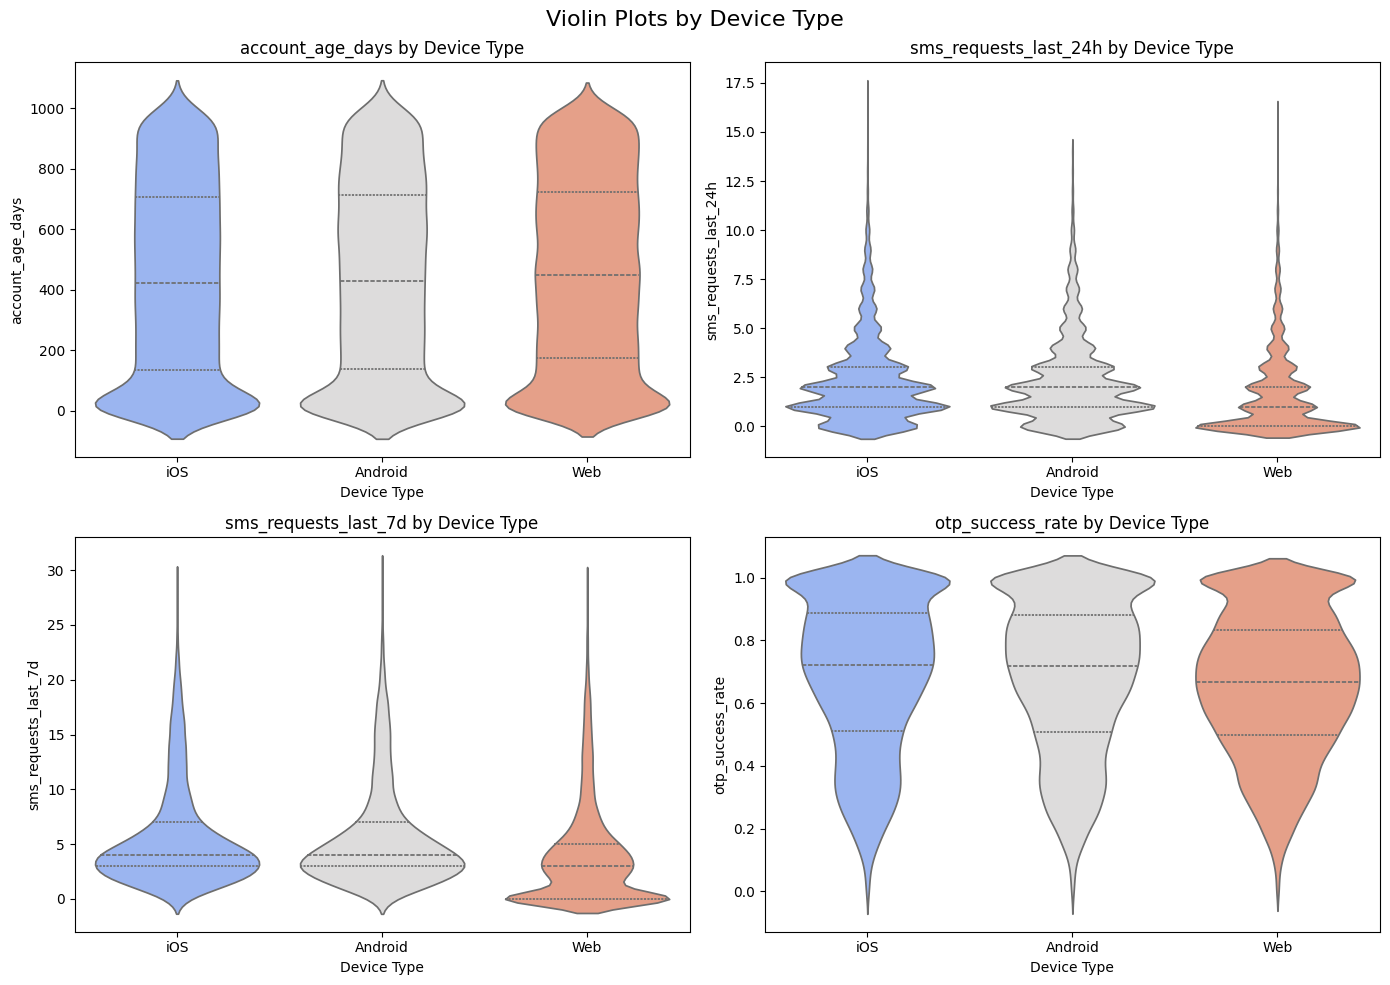

In [7]:
###########################################################################################################
##EDS: Violin Plot by device_type and geo_region
##EDS: Violin PLot by device_type
## Account Age By Device Type
## SMS Requests Last 24h by Device Type
## SMS Requests from Last 7days by Device Type (ios, andriod, web)
## OTP Success Rate by Device Type
###########################################################################################################
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(data=df, x='device_type', y=col, palette="coolwarm", inner="quartile")
    plt.title(f"{col} by Device Type")
    plt.xlabel("Device Type")
    plt.ylabel(col)

plt.suptitle("Violin Plots by Device Type", fontsize=16)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\EDS-Violin_Plots_By_Device_Type.png", dpi=300)
plt.show()

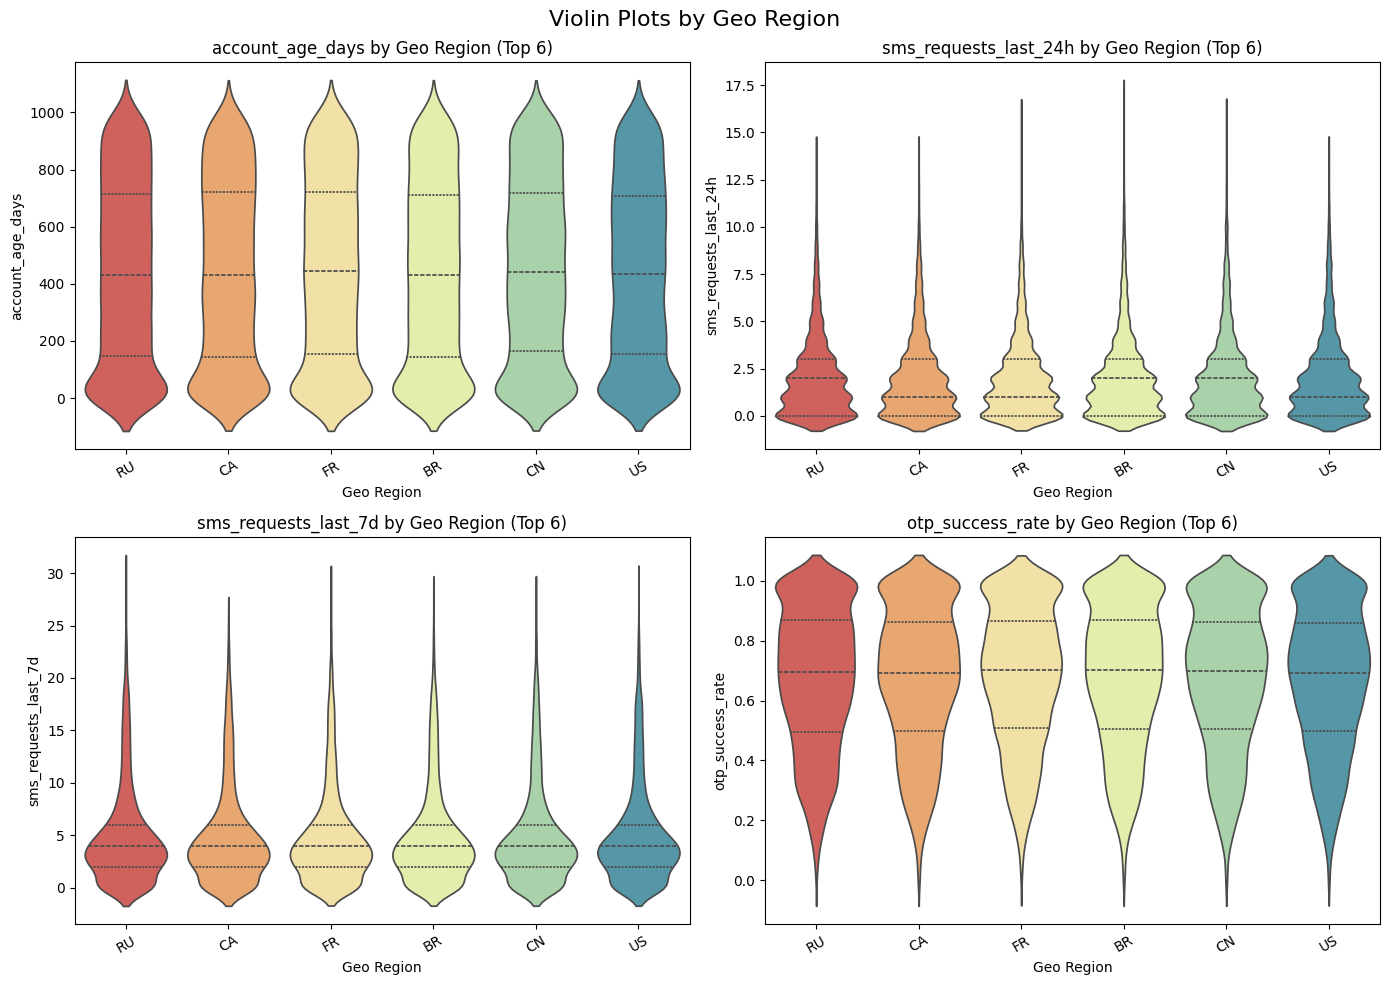

In [8]:
###########################################################################################################
## EDS: Violin by top 6 geo_regions
## Account Age Days by Geo regions
## SMS Requests last 24h by Geo Region
## SMS Requests last 7 days by Geo Region
## OTP Success rate by Geo Region
###########################################################################################################
top_regions = df['geo_region'].value_counts().nlargest(6).index
df_geo = df[df['geo_region'].isin(top_regions)]

plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(data=df_geo, x='geo_region', y=col, palette="Spectral", inner="quartile")
    plt.title(f"{col} by Geo Region (Top 6)")
    plt.xlabel("Geo Region")
    plt.ylabel(col)
    plt.xticks(rotation=30)

plt.suptitle("Violin Plots by Geo Region", fontsize=16)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\EDS-Violin_Plots_By_Geo.png", dpi=300)
plt.show()

## 3A. For the Supervised Model : Preprocessing

In [9]:
#####################################################################################################
## We drop some columns before processing. 
## We will be transforming some Data as well....
## Pipeline SimpleImputer - StandardScalar
## Pipeline SimpleImputer - OneHotEncoder
## ColumnTransformer
######################################################################################################

df = df.drop(columns=['user_id', 'email', 'phone_number', 'browser_fingerprint', 'ip_address'])

X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

## 4A. Supervised Model : Train, Test, Split

In [10]:
####################################################################################################
# We train test and Split the data 
####################################################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5A. Supervised Model : Model Training and Evaluation -- Baselining

Training Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9814
           1       0.99      0.98      0.98      5186

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



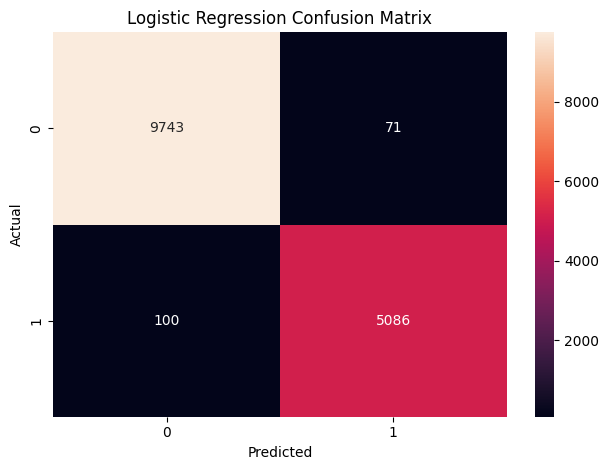

Training Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9814
           1       1.00      1.00      1.00      5186

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



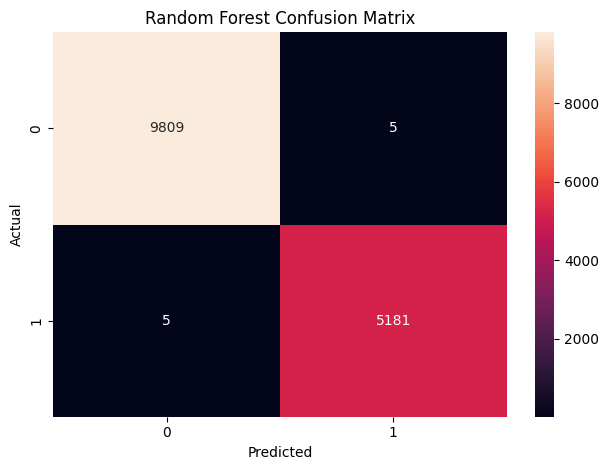

Training XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9814
           1       1.00      1.00      1.00      5186

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



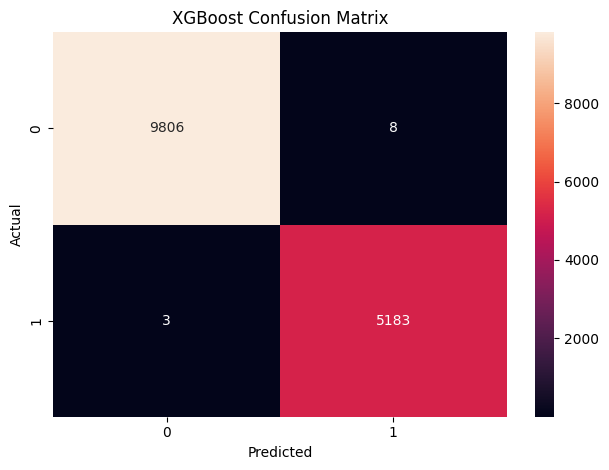

Training LightGBM
[LightGBM] [Info] Number of positive: 12314, number of negative: 22686
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.351829 -> initscore=-0.611011
[LightGBM] [Info] Start training from score -0.611011
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9814
           1       1.00      1.00      1.00      5186

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



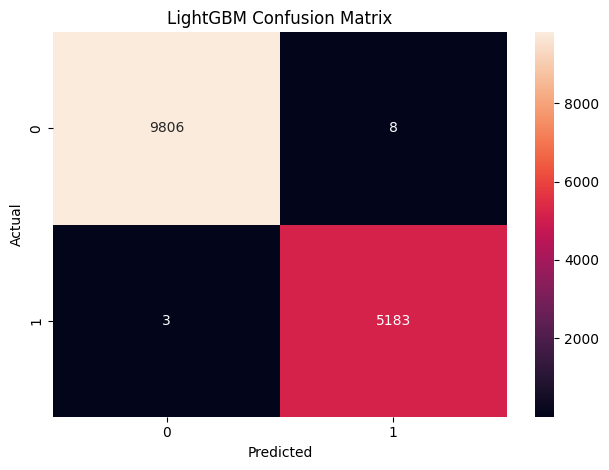

Training KNN
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9814
           1       0.99      1.00      0.99      5186

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



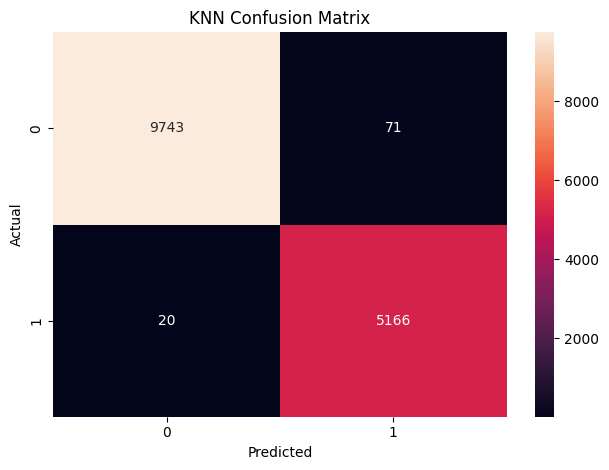

Training Naive Bayes
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      9814
           1       0.94      0.99      0.96      5186

    accuracy                           0.97     15000
   macro avg       0.96      0.98      0.97     15000
weighted avg       0.97      0.97      0.97     15000



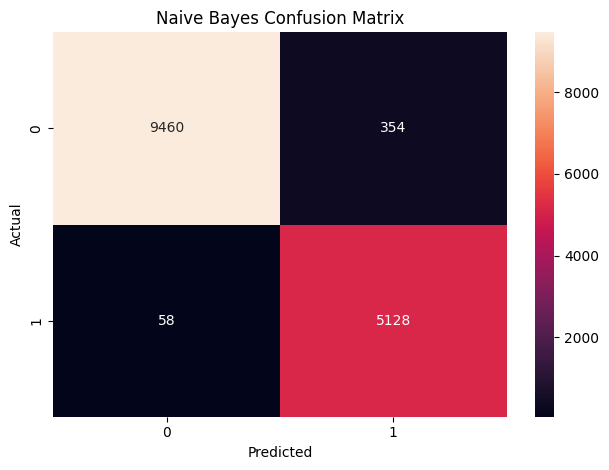

In [11]:
########################################################################################################################
# For the supervised models processing we will be using 6 Models
# Logistic Regresssions
# Random forest
# XGBoost
# KNN 
# Naive Bayes
# Pipeline(), Fit(), Predict() is what we will do here
# Confusion Matrix/Heat maps for each of the Models are plotted and Saved
########################################################################################################################
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = []
y_scores = {}
trained_pipes = {}

for name, model in models.items():
    print(f"Training {name}")
    pipe = Pipeline([('preprocessor', preprocessor), ('classifier', model)])
    pipe.fit(X_train, y_train)

    trained_pipes[name] = pipe
    
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, 'predict_proba') else y_pred
    y_scores[name] = y_proba
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    strSaveFile = "..\\GraphPlots\\Supervised\\"+name+"_ConfusionMatrix"+".png"
    plt.tight_layout()
    plt.savefig(strSaveFile, dpi=300)
    plt.show()

    results.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    })

## 6A. Supervised Model: Model Comparison Summary

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
1,Random Forest,0.999333,0.999036,0.999036,0.999036,0.999988
2,XGBoost,0.999267,0.998459,0.999422,0.998940,0.999994
3,LightGBM,0.999267,0.998459,0.999422,0.998940,0.999992
4,KNN,0.993933,0.986443,0.996143,0.991269,0.999014
0,Logistic Regression,0.988600,0.986232,0.980717,0.983467,0.999310
5,Naive Bayes,0.972533,0.935425,0.988816,0.961380,0.998841


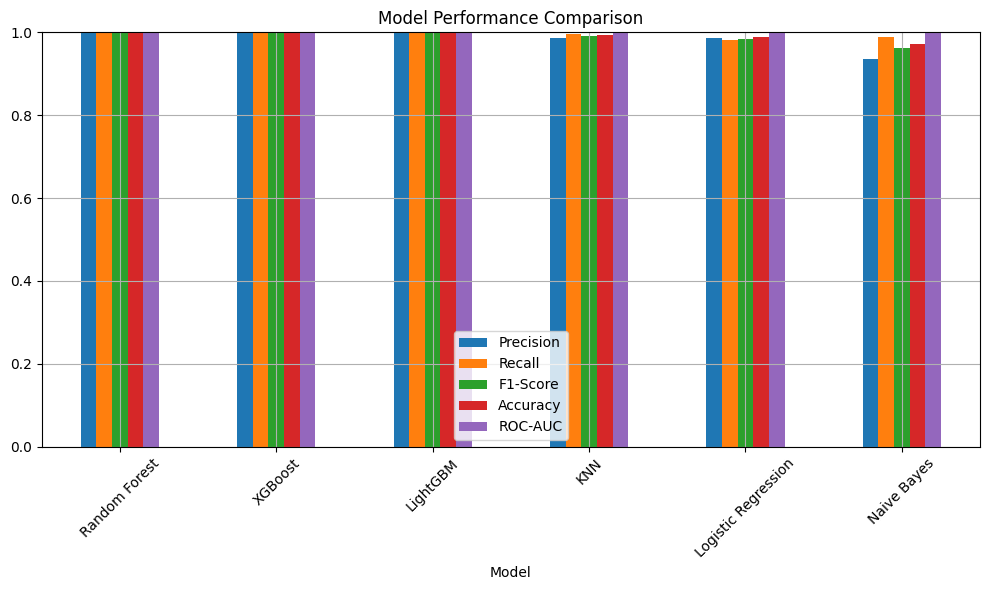

In [12]:
########################################################################################################################
# We will be doing a comparison of each models with respect to...
# Accuracy : The proportion of total predictions (both true positives and true negatives) that were correct.
# Precision : The proportion of positive predictions that are actually correct.
# Recall : The proportion of actual positive instances that are correctly identified by the model.
# F1-Score : The harmonic mean of Precision and Recall, providing a balance between them
# and 
# ROC-AUC : A metric that evaluates the trade-off between true positive rate (recall) and false positive rate across 
#           different thresholds.
#######################################################################################################################

results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
display(results_df)

results_df.set_index('Model')[['Precision', 'Recall', 'F1-Score', 'Accuracy', 'ROC-AUC']].plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Supervised\\Model_Performance_Comparison.png", dpi=300)
plt.show()

## 7A. Supervised Model: ROC Curves

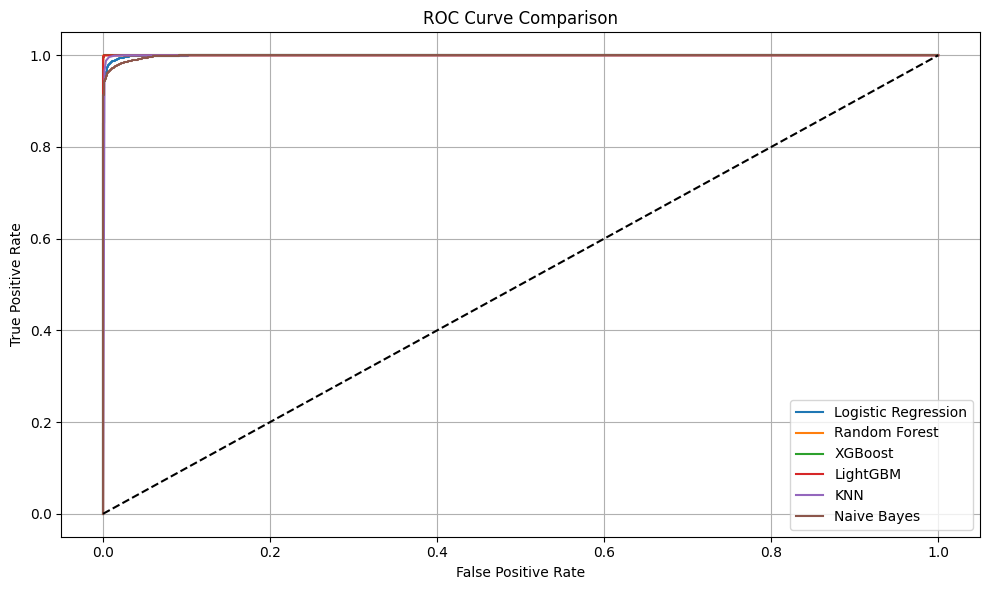

In [13]:
##########################################################################
## Plot of the ROC for Supervised Model: 
## It plots the True Positive Rate (Recall) against the False Positive Rate 
## at various classification thresholds.
## The curve demonstrates how well the model distinguishes between the two 
## classes (fraudulent vs. non-fraudulent).
## The ROC curve helps visualize how good your model is at detecting fraud.
## A higher AUC value (closer to 1.0) indicates a better model.
## In fraud detection, a good ROC-AUC means your model is able to rank 
## fraudulent users higher than genuine users consistently.
##########################################################################
plt.figure(figsize=(10, 6))
for name, scores in y_scores.items():
    fpr, tpr, _ = roc_curve(y_test, scores)
    plt.plot(fpr, tpr, label=f"{name}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Supervised\\ROC_Curve_Comparison.png", dpi=300)
plt.show()

## 8A. Supervised Model: SHAP Feature Importance (XGBoost)

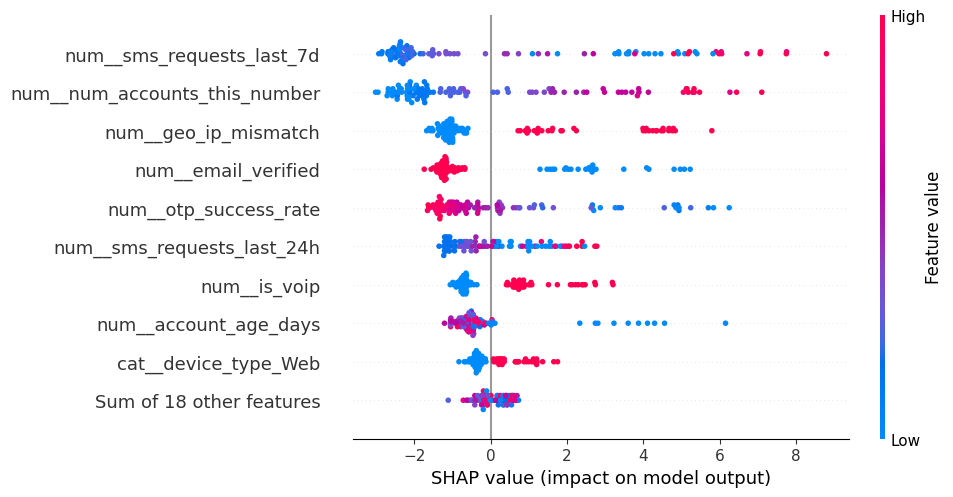

In [14]:
#################################################################################################################################
# Supervised Model: SHAP Feature Importance (XGBoost) refers to using SHAP (SHapley Additive exPlanations) to interpret the 
# XGBoost model by quantifying the contribution of each feature toward a model’s prediction.
# SHAP: Its an explainability technique that computes the impact of each feature on individual predictions and aggregates them 
# across the dataset.
#################################################################################################################################

# Transform features with preprocessing pipeline
X_full_array = preprocessor.fit_transform(X)

# Get column names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Convert to DataFrame with column names
X_full_df = pd.DataFrame(X_full_array.toarray() if hasattr(X_full_array, "toarray") else X_full_array,
                         columns=feature_names)

# Fit XGBoost on named DataFrame
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_full_df, y)

# SHAP Explainer and beeswarm plot
explainer = shap.Explainer(xgb, X_full_df)
shap_values = explainer(X_full_df[:100])

# Plot & save
shap.plots.beeswarm(shap_values, show=False)
plt.savefig("..\\GraphPlots\\Supervised\\SHAP_beeswarm_FeatureImportance_XGB.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Unsupervised Modeling : Begins Here...

## 3B. For the Unsupervised Modeling : Preprocessing

In [15]:
####################################################################
# We Reload into another dataframe Object us_df var.
####################################################################
us_df = pd.read_csv("..\\Data\\Fraud_PhoneAnSMS_Dataset.csv")
print(us_df.shape) 

(50000, 20)


In [16]:
########################################################################################################################
# For the Unsupervised we will again Drop some Cols and pull out the numeric_features and categorical_features out
# Transformation as we did for the Supervised Model
########################################################################################################################

y_true = us_df['is_fraud']
us_df.drop(columns=['is_fraud', 'user_id', 'email', 'phone_number', 'browser_fingerprint', 'ip_address'], inplace=True)

numeric_features = us_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = us_df.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])

X_scaled = preprocessor.fit_transform(us_df)

## 4B. Unsupervised Model: Train Models and Collect Anomaly Predictions

In [17]:
#############################################################################################################################
## Focus is on Anomaly Detection - We will apropraitely Train the Models here
## For the Unsupervised Models we will be using the following Models
## Isolation Forest : Used for large datasets. Instead of modeling normal data behavior, it works by isolating anomalies
## SVM : Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification, regression, 
######## and even anomaly detection. It’s especially known for its ability to handle high-dimensional data and create robust 
######## decision boundaries.
## Local Outlier Factor: Local Outlier Factor (LOF) is a popular unsupervised anomaly detection algorithm that identifies 
#########################data points that deviate significantly from their local neighborhood. It’s especially useful when 
#########################the data has regions of varying density.
## K-Means : K-Means is a classic unsupervised machine learning algorithm used for clustering—grouping data points into 
############ distinct clusters based on similarity.
############ K-Means aims to partition data into K clusters, where each data point belongs to the cluster with the nearest 
##           mean (centroid).
#############################################################################################################################
results = {}

# Isolation Forest
model = IsolationForest(contamination=0.35, random_state=42)
iso_preds = model.fit_predict(X_scaled)
iso_anomalies = np.where(iso_preds == -1, 1, 0)
results["Isolation Forest"] = iso_anomalies

# One-Class SVM
model = OneClassSVM(nu=0.35, kernel="rbf", gamma=0.1)
svm_preds = model.fit_predict(X_scaled)
svm_anomalies = np.where(svm_preds == -1, 1, 0)
results["One-Class SVM"] = svm_anomalies

# LOF
model = LocalOutlierFactor(n_neighbors=20, contamination=0.35)
lof_preds = model.fit_predict(X_scaled)
lof_anomalies = np.where(lof_preds == -1, 1, 0)
results["LOF"] = lof_anomalies

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
distances = np.min(kmeans.transform(X_scaled), axis=1)
threshold = np.percentile(distances, 65)
kmeans_anomalies = (distances > threshold).astype(int)
results["KMeans"] = kmeans_anomalies

## 5B. UnSupervised Model : ROC Curves and Anomaly Distributions

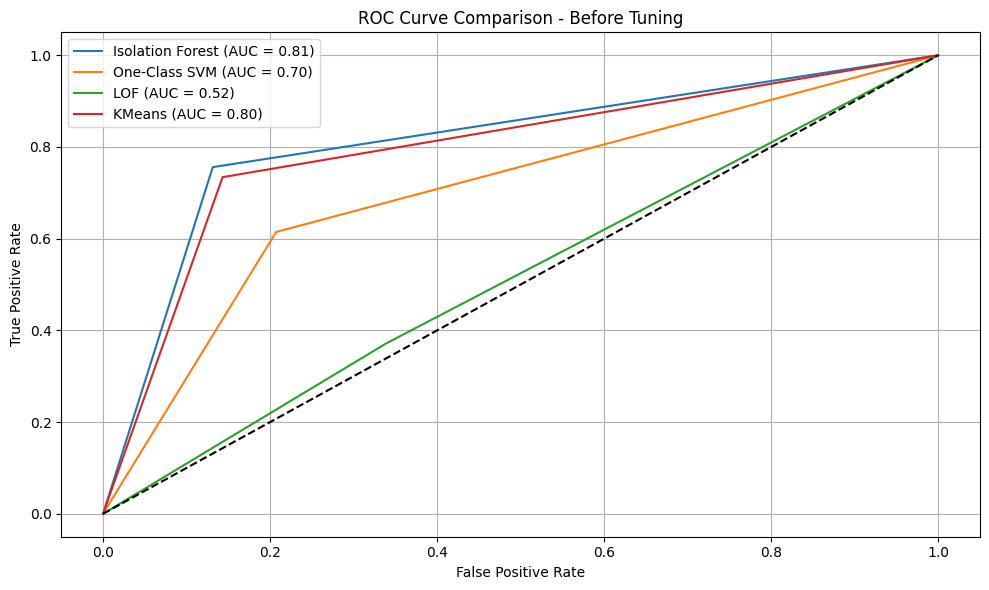

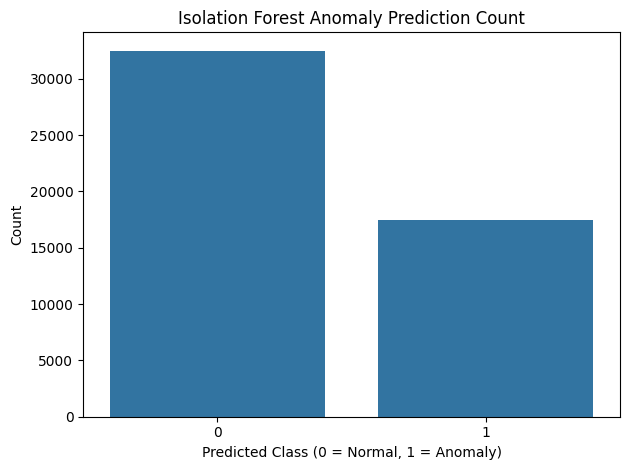

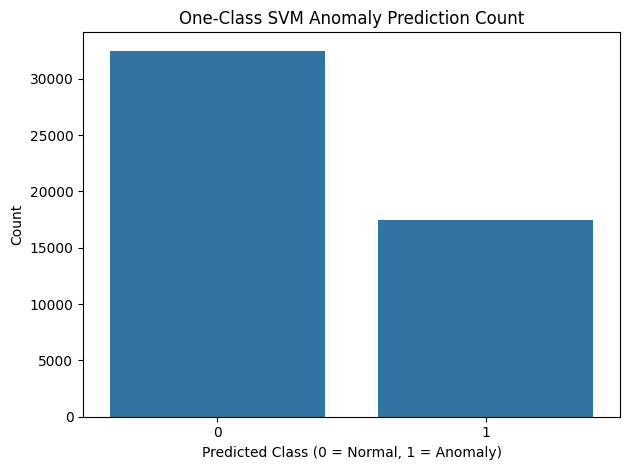

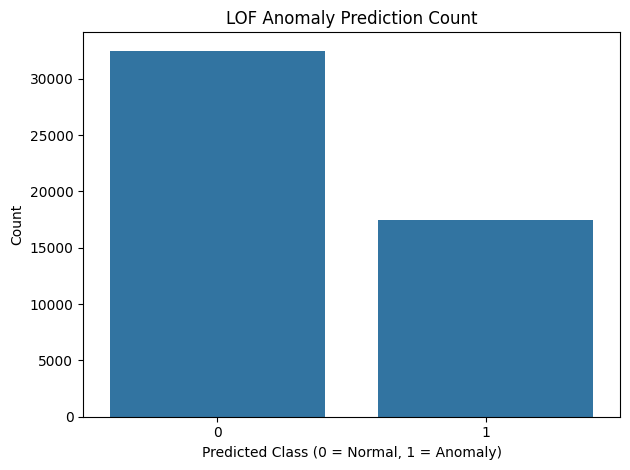

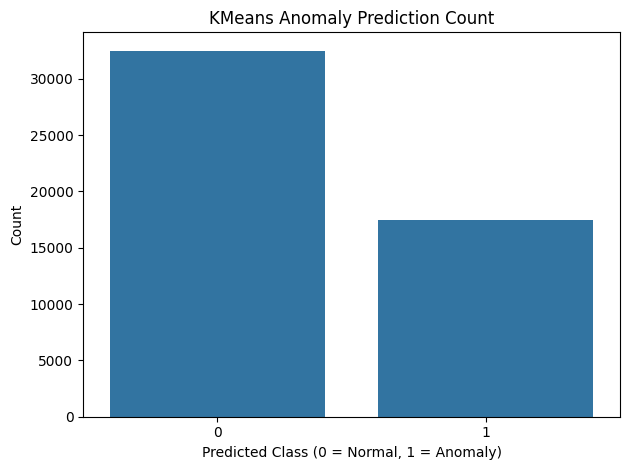

In [18]:

plt.figure(figsize=(10, 6))
for name, preds in results.items():
    fpr, tpr, _ = roc_curve(y_true, preds)
    auc = roc_auc_score(y_true, preds)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison - Before Tuning")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Unsupervised\\ROC_Curve_Comparison_Anomaly_Distributions_UnTuned.png", dpi=300)
plt.show()

# Distribution of anomaly predictions
for name, preds in results.items():
    sns.countplot(x=preds)
    plt.title(f"{name} Anomaly Prediction Count")
    plt.xlabel("Predicted Class (0 = Normal, 1 = Anomaly)")
    plt.ylabel("Count")
    strSaveFile = "..\\GraphPlots\\Unsupervised\\"+name+"_Anomaly_Prediction_Cnt"+".png"
    plt.tight_layout()
    plt.savefig(strSaveFile, dpi=300)
    plt.show()

## 6B. Tuning

In [19]:
#######################################################################################################################
## Tuning & Hyperparameters
## Tuning: Tuning in machine learning refers to the process of optimizing the hyperparameters of a model to improve 
## its performance.
## We are basically doing this to...
## ...Increase accuracy.
## ...Improve generalization (avoiding overfitting/underfitting).
## Find faster or simpler models
## Tuning : Isolation Forest
#######################################################################################################################
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import ParameterGrid

iso_params = {
    'n_estimators': [100, 200],
    'max_samples': ['auto', 0.6],
    'contamination': [0.3, 0.35, 0.4]
}

best_iso_score = 0
best_iso_model = None

for params in ParameterGrid(iso_params):
    model = IsolationForest(**params, random_state=42)
    preds = model.fit_predict(X_scaled)
    anomalies = (preds == -1).astype(int)
    score = roc_auc_score(y_true, anomalies)
    if score > best_iso_score:
        best_iso_score = score
        best_iso_model = model
    print(f"ISO params {params} => ROC AUC: {score:.4f}")

print(f"Best Isolation Forest ROC AUC: {best_iso_score:.4f}")

ISO params {'contamination': 0.3, 'max_samples': 'auto', 'n_estimators': 100} => ROC AUC: 0.7951
ISO params {'contamination': 0.3, 'max_samples': 'auto', 'n_estimators': 200} => ROC AUC: 0.8032
ISO params {'contamination': 0.3, 'max_samples': 0.6, 'n_estimators': 100} => ROC AUC: 0.7272
ISO params {'contamination': 0.3, 'max_samples': 0.6, 'n_estimators': 200} => ROC AUC: 0.7345
ISO params {'contamination': 0.35, 'max_samples': 'auto', 'n_estimators': 100} => ROC AUC: 0.8123
ISO params {'contamination': 0.35, 'max_samples': 'auto', 'n_estimators': 200} => ROC AUC: 0.8214
ISO params {'contamination': 0.35, 'max_samples': 0.6, 'n_estimators': 100} => ROC AUC: 0.7451
ISO params {'contamination': 0.35, 'max_samples': 0.6, 'n_estimators': 200} => ROC AUC: 0.7520
ISO params {'contamination': 0.4, 'max_samples': 'auto', 'n_estimators': 100} => ROC AUC: 0.8157
ISO params {'contamination': 0.4, 'max_samples': 'auto', 'n_estimators': 200} => ROC AUC: 0.8267
ISO params {'contamination': 0.4, 'max

In [20]:
##########################################################
## Tuning : SVM
##########################################################
from sklearn.svm import OneClassSVM

svm_params = {
    'nu': [0.25, 0.35, 0.45],
    'gamma': ['scale', 0.1, 1]
}

best_svm_score = 0
best_svm_model = None

for params in ParameterGrid(svm_params):
    model = OneClassSVM(**params)
    preds = model.fit_predict(X_scaled)
    anomalies = (preds == -1).astype(int)
    score = roc_auc_score(y_true, anomalies)
    if score > best_svm_score:
        best_svm_score = score
        best_svm_model = model
    print(f"SVM params {params} => ROC AUC: {score:.4f}")

print(f"Best One-Class SVM ROC AUC: {best_svm_score:.4f}")

SVM params {'gamma': 'scale', 'nu': 0.25} => ROC AUC: 0.6562
SVM params {'gamma': 'scale', 'nu': 0.35} => ROC AUC: 0.7013
SVM params {'gamma': 'scale', 'nu': 0.45} => ROC AUC: 0.7339
SVM params {'gamma': 0.1, 'nu': 0.25} => ROC AUC: 0.6573
SVM params {'gamma': 0.1, 'nu': 0.35} => ROC AUC: 0.7037
SVM params {'gamma': 0.1, 'nu': 0.45} => ROC AUC: 0.7361
SVM params {'gamma': 1, 'nu': 0.25} => ROC AUC: 0.5939
SVM params {'gamma': 1, 'nu': 0.35} => ROC AUC: 0.5848
SVM params {'gamma': 1, 'nu': 0.45} => ROC AUC: 0.5554
Best One-Class SVM ROC AUC: 0.7361


In [21]:
##########################################################
## Tuning : LOF
##########################################################
from sklearn.neighbors import LocalOutlierFactor

lof_params = {
    'n_neighbors': [20, 40, 60],
    'contamination': [0.3, 0.35, 0.4]
}

best_lof_score = 0

for params in ParameterGrid(lof_params):
    model = LocalOutlierFactor(**params)
    preds = model.fit_predict(X_scaled)
    anomalies = (preds == -1).astype(int)
    score = roc_auc_score(y_true, anomalies)
    if score > best_lof_score:
        best_lof_score = score
    print(f"LOF params {params} => ROC AUC: {score:.4f}")

print(f"Best LOF ROC AUC: {best_lof_score:.4f}")

LOF params {'contamination': 0.3, 'n_neighbors': 20} => ROC AUC: 0.5190
LOF params {'contamination': 0.3, 'n_neighbors': 40} => ROC AUC: 0.5126
LOF params {'contamination': 0.3, 'n_neighbors': 60} => ROC AUC: 0.5064
LOF params {'contamination': 0.35, 'n_neighbors': 20} => ROC AUC: 0.5163
LOF params {'contamination': 0.35, 'n_neighbors': 40} => ROC AUC: 0.5135
LOF params {'contamination': 0.35, 'n_neighbors': 60} => ROC AUC: 0.5065
LOF params {'contamination': 0.4, 'n_neighbors': 20} => ROC AUC: 0.5147
LOF params {'contamination': 0.4, 'n_neighbors': 40} => ROC AUC: 0.5129
LOF params {'contamination': 0.4, 'n_neighbors': 60} => ROC AUC: 0.5062
Best LOF ROC AUC: 0.5190


In [22]:
##########################################################
## Tuning : KMeans
##########################################################
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
distances = np.min(kmeans.transform(X_scaled), axis=1)

thresholds = [60, 65, 70]
for t in thresholds:
    thresh = np.percentile(distances, t)
    anomalies = (distances > thresh).astype(int)
    score = roc_auc_score(y_true, anomalies)
    print(f"KMeans threshold {t}th percentile => ROC AUC: {score:.4f}")

KMeans threshold 60th percentile => ROC AUC: 0.7955
KMeans threshold 65th percentile => ROC AUC: 0.7955
KMeans threshold 70th percentile => ROC AUC: 0.7866


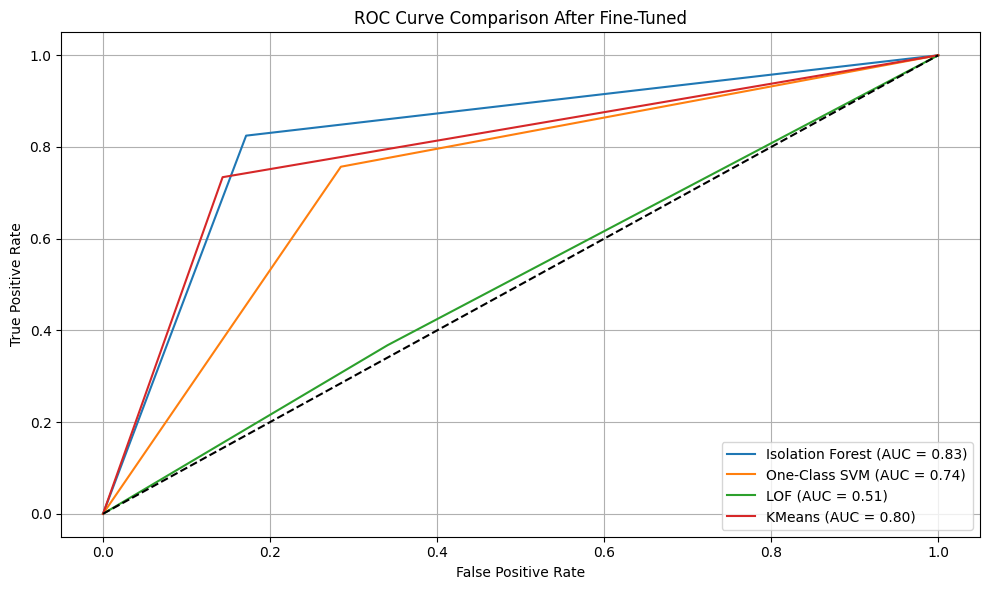

In [23]:
##############################################################################################################
####ROC Curve Comparison
## It plots the True Positive Rate (TPR) vs. False Positive Rate (FPR) at different classification thresholds:
##|-------------------------------------------------------------------------------|
##| Shape of ROC Curve          | Interpretation                                  |
##|-----------------------------|-------------------------------------------------|
##| Curve hugs top-left corner  | Excellent model (high TPR, low FPR)             |
##| Curve is diagonal line      | Random guessing (AUC = 0.5)                     |
##| Curve below diagonal        | Model is worse than random (often inverted)     |
##############################################################################################################

from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))
for name, model in {
    "Isolation Forest": best_iso_model,
    "One-Class SVM": best_svm_model,
}.items():
    preds = model.fit_predict(X_scaled)
    anomalies = (preds == -1).astype(int)
    fpr, tpr, _ = roc_curve(y_true, anomalies)
    auc = roc_auc_score(y_true, anomalies)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# LOF separately (not fit/predict API)
lof_model = LocalOutlierFactor(n_neighbors=40, contamination=0.35)
lof_preds = lof_model.fit_predict(X_scaled)
lof_anomalies = (lof_preds == -1).astype(int)
fpr, tpr, _ = roc_curve(y_true, lof_anomalies)
auc = roc_auc_score(y_true, lof_anomalies)
plt.plot(fpr, tpr, label=f"LOF (AUC = {auc:.2f})")

# KMeans visualization
distances = np.min(KMeans(n_clusters=2, random_state=42).fit(X_scaled).transform(X_scaled), axis=1)
thresh = np.percentile(distances, 65)
kmeans_anomalies = (distances > thresh).astype(int)
fpr, tpr, _ = roc_curve(y_true, kmeans_anomalies)
auc = roc_auc_score(y_true, kmeans_anomalies)
plt.plot(fpr, tpr, label=f"KMeans (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison After Fine-Tuned")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Unsupervised\\ROC_Curve_Comparison_Tuned.png", dpi=300)
plt.show()

## 7B. Prediction Plots

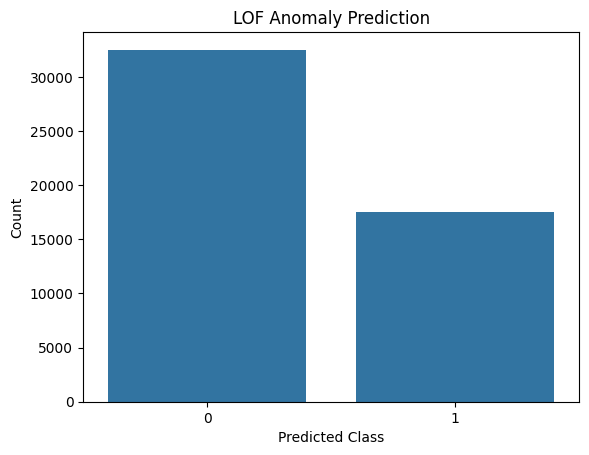

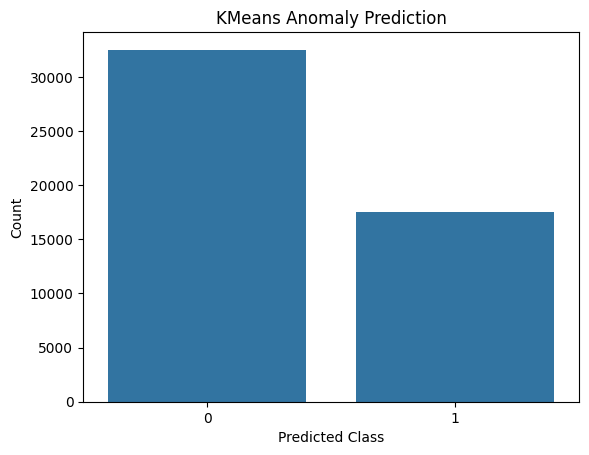

In [24]:
#########################################################
####Anomaly Prediction Count Plots
#########################################################
sns.countplot(x=lof_anomalies)
plt.title("LOF Anomaly Prediction")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.savefig("..\\GraphPlots\\Unsupervised\\LOF Anomaly_Pred.png", dpi=300)
plt.show()

sns.countplot(x=kmeans_anomalies)
plt.title("KMeans Anomaly Prediction")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.savefig("..\\GraphPlots\\Unsupervised\\KMeans_Anomaly_Pred.png", dpi=300)
plt.show()

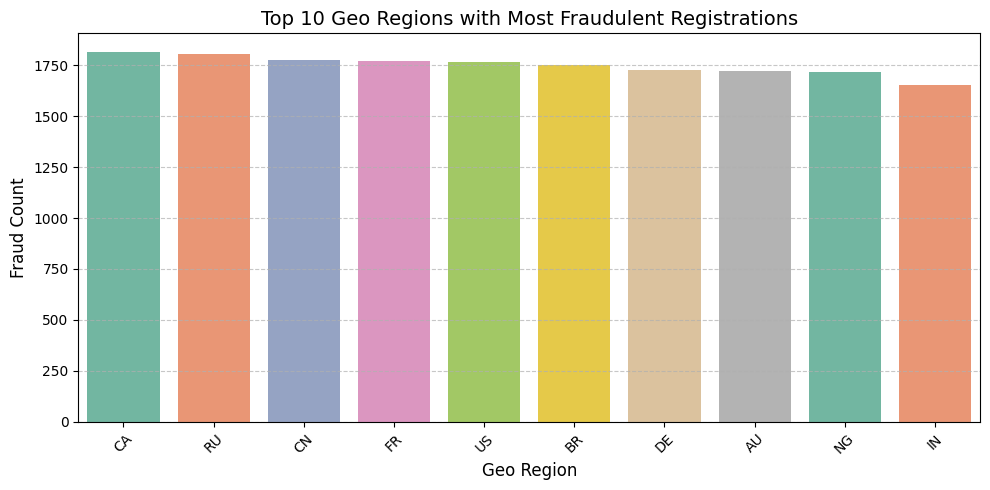

In [31]:
################################################################################################
##Fraud by Geo Regions – Most Faudulent Registrations
################################################################################################
us_df = pd.read_csv("..\\Data\\Fraud_PhoneAnSMS_Dataset.csv")  # or wherever your original file is

fraud_by_geo = us_df[us_df['is_fraud'] == 1]['geo_region'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_by_geo.index, y=fraud_by_geo.values, palette="Set2")
plt.title("Top 10 Geo Regions with Most Fraudulent Registrations", fontsize=14)
plt.ylabel("Fraud Count", fontsize=12)
plt.xlabel("Geo Region", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Unsupervised\\Top_10_Geo_With_Most_Fraudulent_Registration.png", dpi=300)
plt.show()

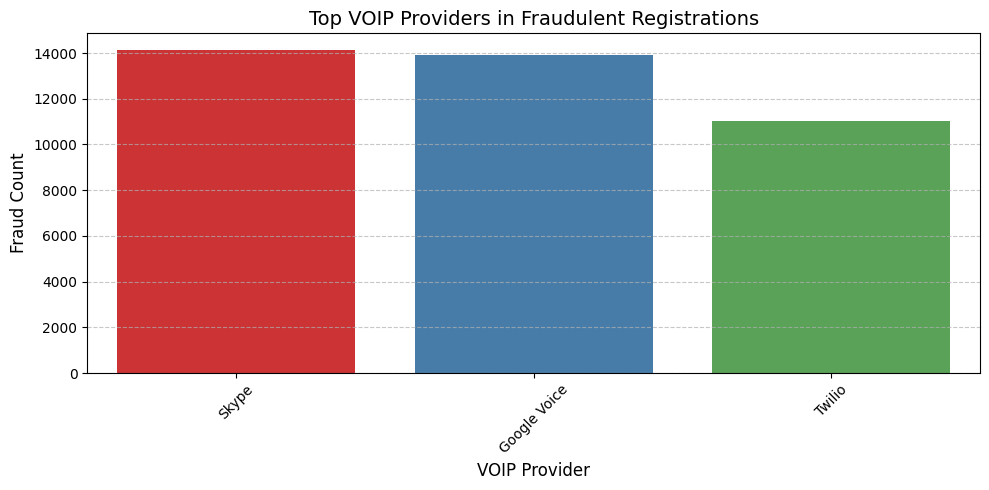

In [32]:
#####################################################################################
##VOIP Providers in Fraud – Fraudulent Registrations
#####################################################################################
voip_provider_counts = us_df['voip_provider'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=voip_provider_counts.index, y=voip_provider_counts.values, palette="Set1")
plt.title("Top VOIP Providers in Fraudulent Registrations", fontsize=14)
plt.ylabel("Fraud Count", fontsize=12)
plt.xlabel("VOIP Provider", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Unsupervised\\Top_VOIP_.png", dpi=300)
plt.show()

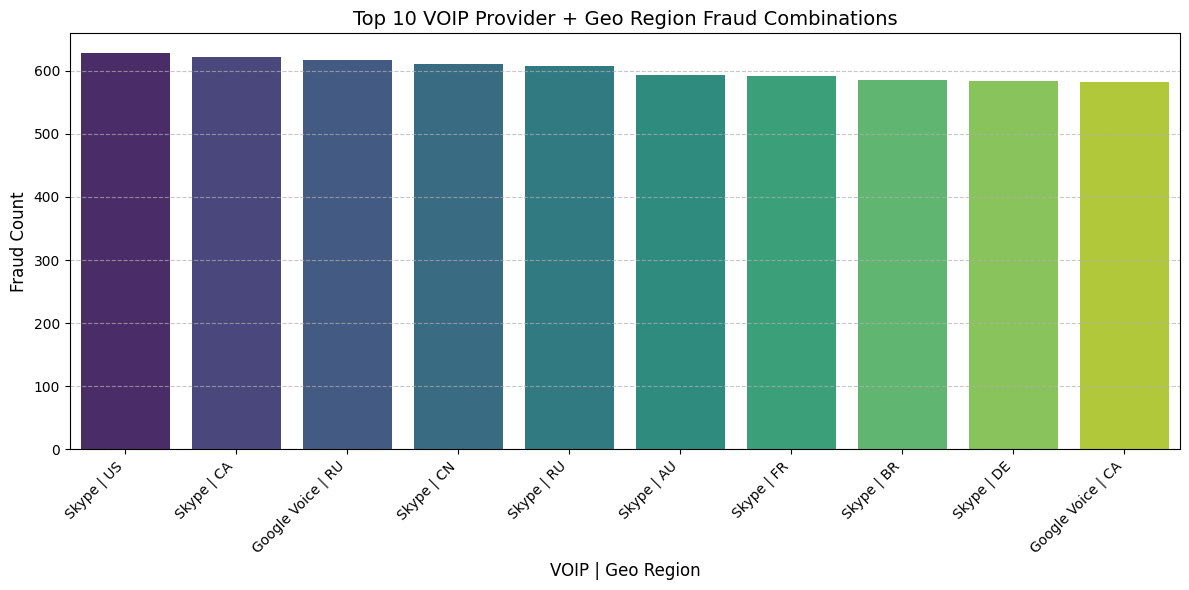

In [35]:
###################################################################################################
## Top 10 VOIP Provider and Geo Region Fraud Combinations
###################################################################################################
##voip_geo['label'] = voip_geo['voip_provider'] + " | " + voip_geo['geo_region']
##top_voip_geo = voip_geo.sort_values('count', ascending=False).head(10)
if 'fraud_prediction_unsupervised' in us_df.columns:
    voip_geo = us_df[us_df['fraud_prediction_unsupervised'] == 1].groupby(['voip_provider', 'geo_region']).size().reset_index(name='count')
elif 'is_fraud' in us_df.columns:
    voip_geo = us_df[us_df['is_fraud'] == 1].groupby(['voip_provider', 'geo_region']).size().reset_index(name='count')
else:
    raise ValueError("No fraud label found in the dataframe.")
voip_geo['label'] = voip_geo['voip_provider'] + " | " + voip_geo['geo_region']
top_voip_geo = voip_geo.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_voip_geo, x='label', y='count', palette="viridis")

plt.title("Top 10 VOIP Provider + Geo Region Fraud Combinations", fontsize=14)
plt.ylabel("Fraud Count", fontsize=12)
plt.xlabel("VOIP | Geo Region", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Unsupervised\\Top_10_VOIP_Provider_GeoRegio_FraudCombo.png", dpi=300)
plt.show()

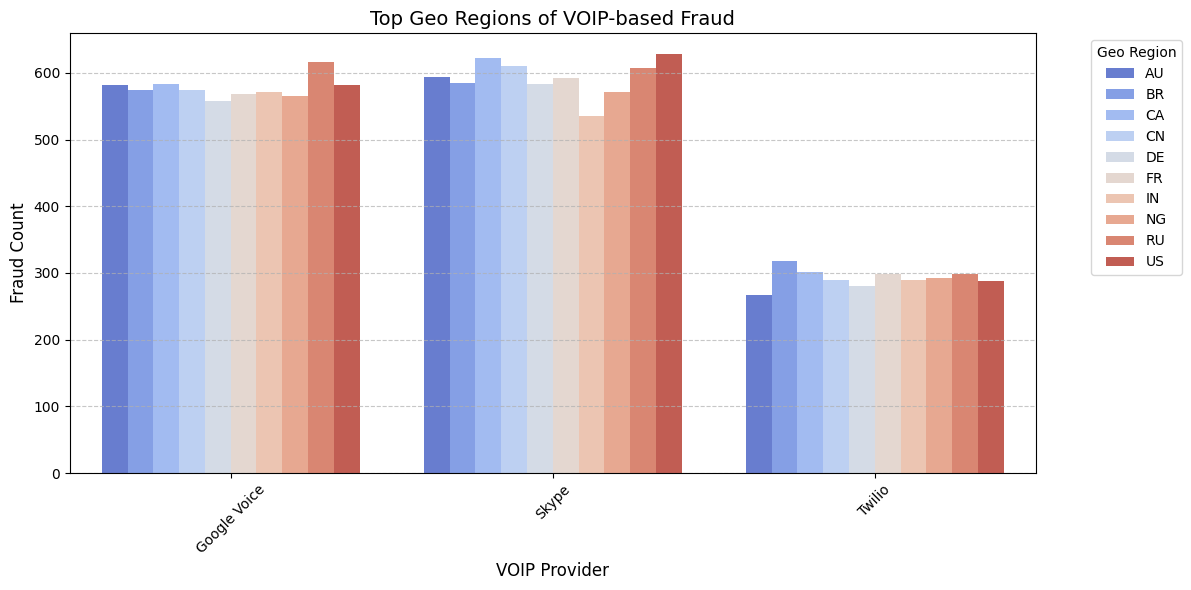

In [36]:
###################################################################################################
## Top Geo Regions of VOID-Based Fraud
###################################################################################################
plt.figure(figsize=(12, 6))
sns.barplot(data=voip_geo, x='voip_provider', y='count', hue='geo_region', palette="coolwarm")

plt.title("Top Geo Regions of VOIP-based Fraud", fontsize=14)
plt.ylabel("Fraud Count", fontsize=12)
plt.xlabel("VOIP Provider", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Geo Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Unsupervised\\Top_Geo_Regions_Of_VOIP_Based_Fraud.png", dpi=300)
plt.show()

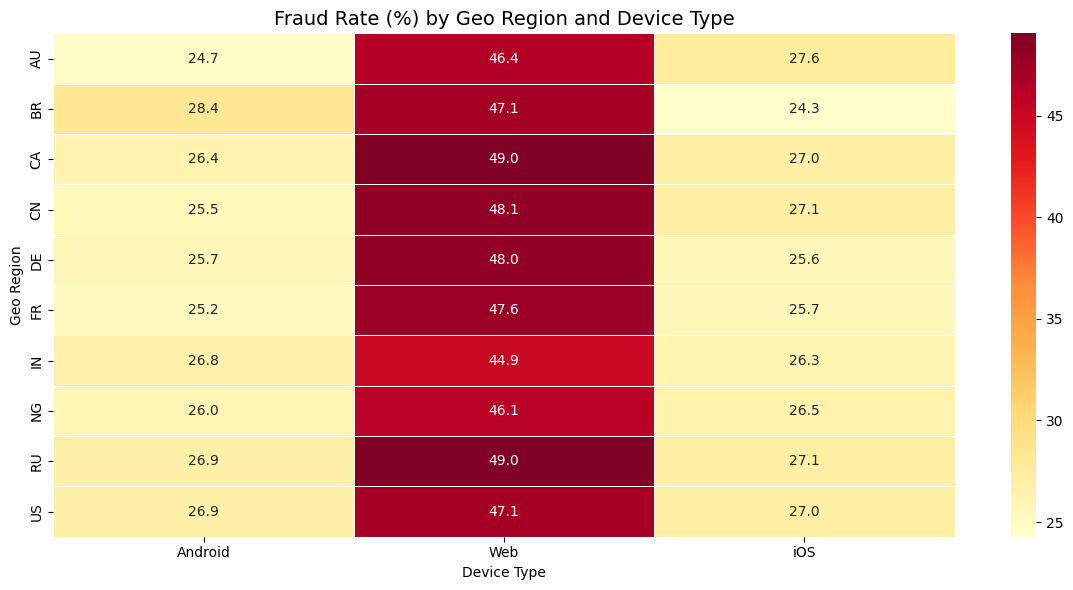

In [37]:
#####################################################################################################
##Heatmap: Fraud Rate by Geo Region and Device Type
######################################################################################################
heatmap_data = df.groupby(['geo_region', 'device_type'])['is_fraud'].mean().unstack().fillna(0) * 100

# Step 2: Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5)
plt.title("Fraud Rate (%) by Geo Region and Device Type", fontsize=14)
plt.ylabel("Geo Region")
plt.xlabel("Device Type")
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Unsupervised\\Fraud_Rate_By_Geo_And_Device.png", dpi=300)
plt.show()

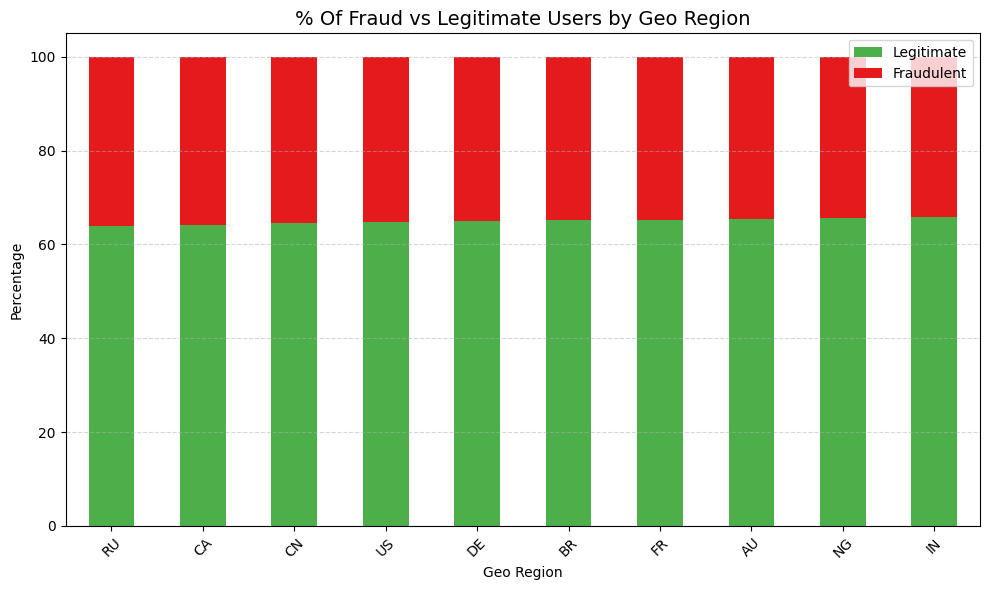

In [38]:
################################################################################################
##Stacked Bar Plot: % Fraud vs Legitimate per Geo Region
# Step 1: Count fraud and legit entries per region
################################################################################################
geo_counts = df.groupby(['geo_region', 'is_fraud']).size().unstack(fill_value=0)
geo_counts = geo_counts[geo_counts.sum(axis=1) > 50]  # keep only meaningful data

# Step 2: Normalize to % per region
geo_percent = geo_counts.div(geo_counts.sum(axis=1), axis=0) * 100
geo_percent.columns = ['Legitimate', 'Fraudulent']

# Step 3: Plot
geo_percent.sort_values("Fraudulent", ascending=False).head(10).plot(
    kind='bar', stacked=True, figsize=(10, 6), color=["#4daf4a", "#e41a1c"]
)

plt.title("% Of Fraud vs Legitimate Users by Geo Region", fontsize=14)
plt.ylabel("Percentage")
plt.xlabel("Geo Region")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Unsupervised\\Percent_Of_Fraud_Vs_Legitimate_Users_By_GeoRegion.png", dpi=300)
plt.show()

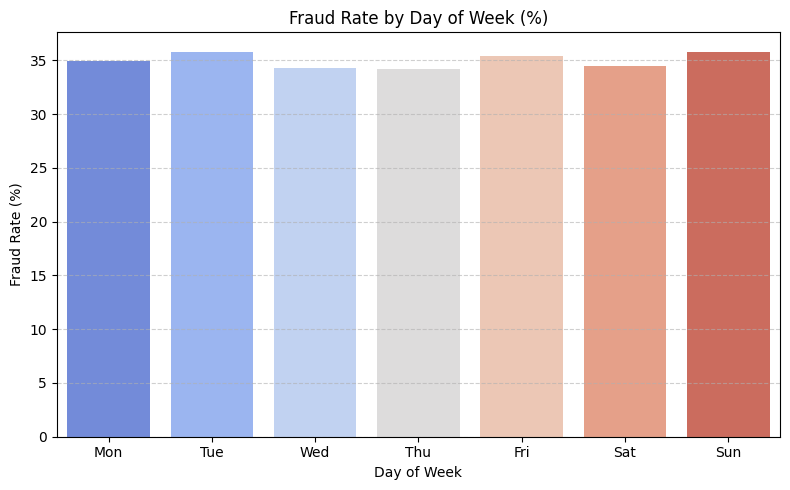

In [39]:
######################################################################################
##Fraud by Day of the week
# Mapping 0–6 to weekday names
######################################################################################
weekday_map = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
df["registration_dayofweek_label"] = df["registration_dayofweek"].map(weekday_map)

# Fraud % by day of week
fraud_by_day = df.groupby("registration_dayofweek_label")["is_fraud"].mean().reindex(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]) * 100

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, palette="coolwarm")
plt.title("Fraud Rate by Day of Week (%)")
plt.xlabel("Day of Week")
plt.ylabel("Fraud Rate (%)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Unsupervised\\Fraud_Rate_By_DayOfWk.png", dpi=300)
plt.show()

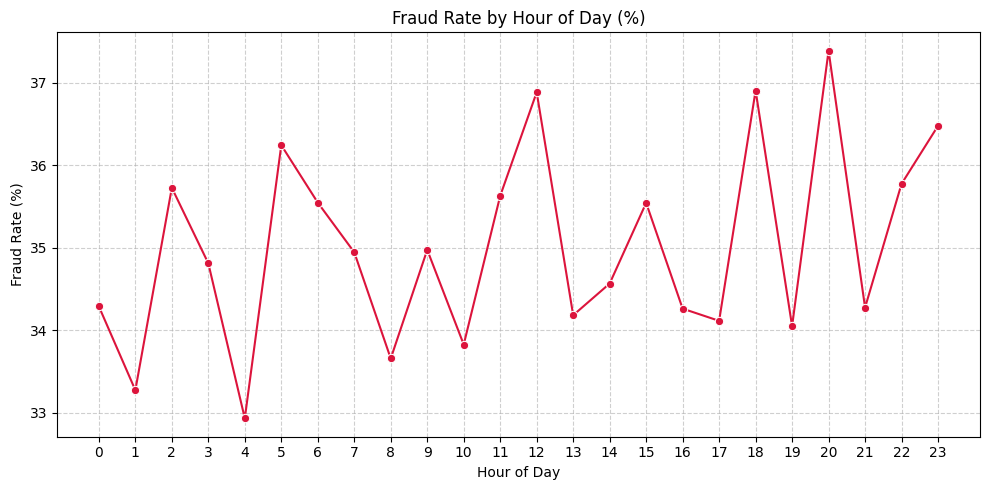

In [40]:
################################################
##Fraud by Hr of the Week
##Fraud % by registration hour (0–23)
#################################################
fraud_by_hour = df.groupby("registration_hour")["is_fraud"].mean() * 100

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker="o", color="crimson")
plt.title("Fraud Rate by Hour of Day (%)")
plt.xlabel("Hour of Day")
plt.ylabel("Fraud Rate (%)")
plt.xticks(range(0, 24))
plt.grid(axis="both", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Unsupervised\\Fraud_Rate_By_HrOfDay.png", dpi=300)
plt.show()

## 8B. SHAP (SHapley Additive exPlanations)

In [41]:
#######################################################################################################
#SHAP (SHapley Additive exPlanations) provides a robust and sound method to interpret model predictions
#by making attributes of importance scores to input features. What is SHAP? SHAP is a method that helps
#us understand how a machine learning model makes decisions.
##XGBClassifier
########################################################################################################
import xgboost as xgb
from sklearn.model_selection import train_test_split
us_df = pd.read_csv("..\\Data\\Fraud_PhoneAnSMS_Dataset.csv")
# Drop non-numeric columns and target
X = us_df.drop(columns=['is_fraud', 'user_id', 'email', 'phone_number', 'ip_address',
                     'browser_fingerprint', 'voip_provider'])
X = pd.get_dummies(X, drop_first=True)
y = us_df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = xgb.XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [42]:
import shap ##Actually this is already done up in the declarations
########################################################################################################################
## Create SHAP explainer and compute values
## explainer = shap.Explainer(model) / Initializes a SHAP explainer object for your trained model. SHAP automatically
## detects the model type (e.g., tree-based, linear, neural net) and chooses the best explanation algorithm.
##--------------------------------
## shap_values = explainer(X_test) / Computes SHAP values for each sample in X_test / These values represent 
## how much each feature contributed to the model’s prediction for each instance.
########################################################################################################################
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

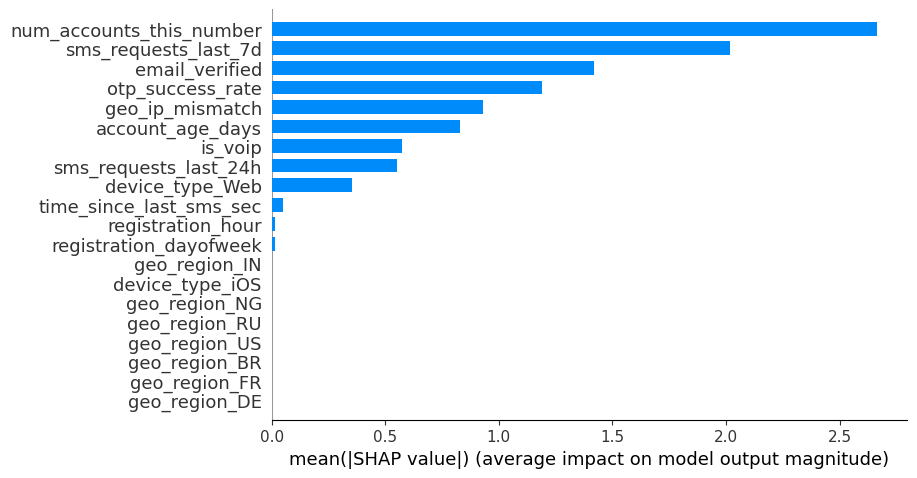

In [43]:
#####################################################
##Plotting the SHAP Summary Bar Plot
#####################################################
fig = shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
# Now adjust layout directly on the figure
fig = plt.gcf()
fig.set_size_inches(10, 6)  # Optional: increase size
fig.subplots_adjust(bottom=0.3)  # Key line: make space for x-axis title
# Save the figure without clipping
fig.savefig("..\\GraphPlots\\Supervised\\shap_summary_bar_plot.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

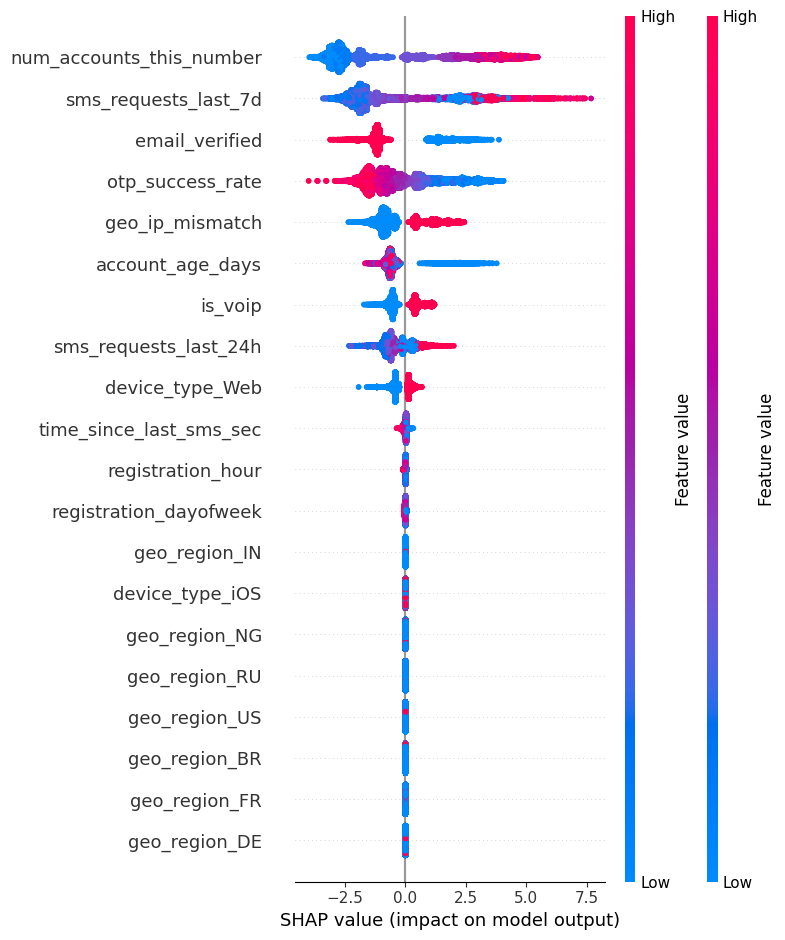

In [44]:
#####################################################
##Plotting the SHAP Summary beeswarm plot
#####################################################
shap.summary_plot(shap_values, X_test, show=False )
plt.savefig("..\\GraphPlots\\Supervised\\SHAP_beeswarm_plot.png", dpi=300, bbox_inches='tight')
shap.summary_plot(shap_values, X_test)
plt.close()

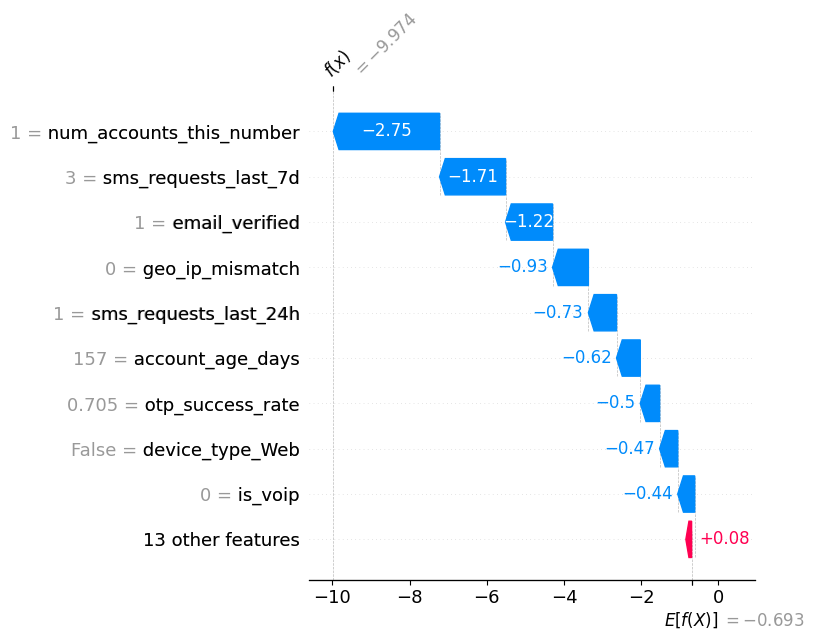

In [45]:
########################################################################################################################
##Plotting the SHAP Summary waterfall plot
###Feature Importance: The vertical order shows which features have the biggest overall impact. At the top, 
##num_accounts_this_number has the strongest influence—mostly negative.
##SHAP Value Spread: The horizontal axis shows SHAP values, which represent how much each feature pushes the prediction 
##higher or lower. Negative values pull the prediction down; positive values push it up.
##Observations: May Change pertaining to Data. The current Data Set...
##-----------------------------------------------------------------------------------------------------------------------
## Most impactful features: num_accounts_this_number, sms_requests_last_7d, and email_verified are driving predictions 
## downward.
## Subtle contributors: A group of 13 other features has a slight positive influence, but not enough to offset the top 
## negative drivers.
## Model behavior: From the Plot we can assertain that model seems to be associated with multiple accounts, frequent SMS
## requests, and unverified emails with higher risk or lower target scores.
########################################################################################################################
idx = 10
fig = shap.plots.waterfall(shap_values[idx], show=False)
# Fix x-tick labels
plt.xticks(rotation=45)
# Tidy layout and save
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Supervised\\SHAP_waterfall_plot.png", dpi=300, bbox_inches='tight')
# Show only if needed
plt.show()
# Close to avoid overlap with next plots
plt.close()

In [46]:
###########################################################################################
##Code to Compare Feature Importances in Subplots
##Logistic Regression (absolute coefficients)
##Random Forest (feature importances)
##XGBoost (gain-based importance)
############################################################################################
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train models
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

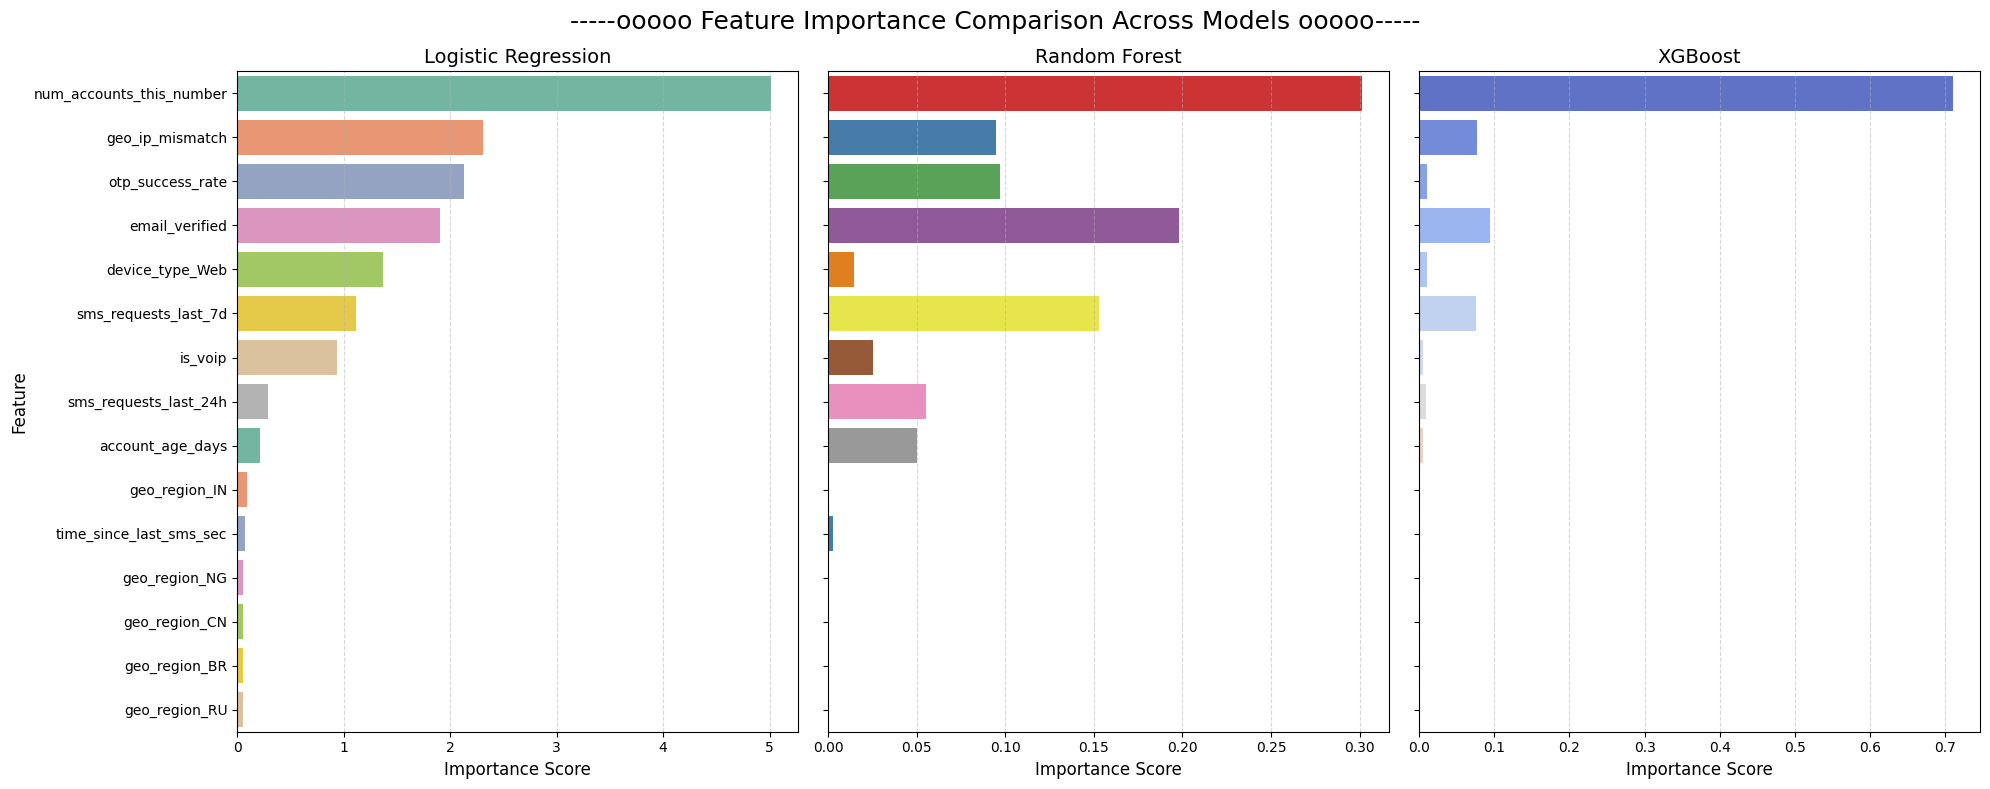

In [48]:
#######################################################################################################################
## Plots of Feature Importance Comparison Across Models : Logistic Regression, Random Forest, XGBoost
########################################################################################################################
import matplotlib.pyplot as plt
import seaborn as sns

# Extract importances
lr_importance = np.abs(lr.coef_[0])
rf_importance = rf.feature_importances_
xgb_importance = xgb_model.feature_importances_

# Combine into a DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Logistic Regression': lr_importance,
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance
}).set_index('Feature')

# Average and sort
importance_df["Average"] = importance_df.mean(axis=1)
importance_df = importance_df.sort_values("Average", ascending=False).drop("Average", axis=1)

# Set color palettes
palettes = {
    "Logistic Regression": "Set2",
    "Random Forest": "Set1",
    "XGBoost": "coolwarm"
}

# Plot
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

for ax, model in zip(axes, importance_df.columns):
    sns.barplot(
        x=importance_df[model][:15],
        y=importance_df.index[:15],
        ax=ax,
        palette=palettes[model]
    )
    ax.set_title(f"{model}", fontsize=14)
    ax.set_xlabel("Importance Score", fontsize=12)
    ax.set_ylabel("Feature", fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

fig.suptitle("-----ooooo Feature Importance Comparison Across Models ooooo-----", fontsize=18)
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Supervised\\Feature_Importance_Comparison_Across_Models.png", dpi=300, bbox_inches='tight')
plt.show()

In [49]:
#########################################
# Are we still holding good with the Data
#########################################
us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   50000 non-null  object 
 1   email                     50000 non-null  object 
 2   geo_region                50000 non-null  object 
 3   phone_number              50000 non-null  object 
 4   is_voip                   50000 non-null  int64  
 5   voip_provider             39115 non-null  object 
 6   account_age_days          50000 non-null  int64  
 7   sms_requests_last_24h     50000 non-null  int64  
 8   sms_requests_last_7d      50000 non-null  int64  
 9   otp_success_rate          50000 non-null  float64
 10  num_accounts_this_number  50000 non-null  int64  
 11  geo_ip_mismatch           50000 non-null  int64  
 12  time_since_last_sms_sec   50000 non-null  int64  
 13  device_type               50000 non-null  object 
 14  regist

In [50]:
#########################################################################
# Here we are collating both Supervised and Unsupervised Data
## Then we combine our results for capturing it within a single output
## File
## How confident are we with our prediction??????
## predict_proba : method in scikit-learn that returns the probability 
## estimates for each class label in a classification task. It tells 
## us how confident the model is about each possible class
########################################################################
# Step 1: Scale the features for IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Define feature columns to scale (drop non-numeric/categorical)
feature_cols_unsup = us_df.drop(columns=[
    'user_id', 'email', 'phone_number', 'browser_fingerprint', 'ip_address', 'is_fraud'
], errors='ignore').select_dtypes(include='number').columns.tolist()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(us_df[feature_cols_unsup])

# Step 2: Unsupervised model
iso = IsolationForest(contamination=0.35, random_state=42)
us_df['anomaly_label'] = iso.fit_predict(X_scaled)  # -1 = anomaly
us_df['fraud_prediction_unsupervised'] = (us_df['anomaly_label'] == -1).astype(int)

# Step 3: Supervised model (from already trained pipeline)
selected_model_name = "XGBoost"
model = trained_pipes[selected_model_name]

feature_cols = us_df.drop(columns=[
    'user_id', 'email', 'phone_number', 'browser_fingerprint', 'ip_address', 'is_fraud'
], errors='ignore').columns.tolist()

us_df['fraud_score_supervised'] = model.predict_proba(us_df[feature_cols])[:, 1]
us_df['fraud_prediction_supervised'] = (us_df['fraud_score_supervised'] >= 0.5).astype(int)

# Step 4: Combine results
us_df['high_risk'] = ((us_df['fraud_prediction_supervised'] == 1) &
                      (us_df['fraud_prediction_unsupervised'] == 1)).astype(int)

# Final confirmed frauds
confirmed_frauds = us_df[us_df['high_risk'] == 1][['phone_number', 'fraud_score_supervised']]

In [51]:
####################################################################################
##Desired Result of this Project : Saving Everything into a XLS
## Saving the Fraudulent Phone number to a XLS Potential_Phone_Fraudulent_Nos.xls
####################################################################################
suspicious_numbers = us_df[us_df['fraud_prediction_supervised'] == 1][['phone_number', 'fraud_score_supervised']]
suspicious_unsup = us_df[us_df['fraud_prediction_unsupervised'] == 1][['phone_number']]
with pd.ExcelWriter("..\\Data\\FraudPhoneNumbers\\Potential_Phone_Fraudulent_Nos.xlsx", engine='xlsxwriter') as writer:
    suspicious_numbers.to_excel(writer, sheet_name='Supervised_Frauds', index=False)
    suspicious_unsup.to_excel(writer, sheet_name='Unsupervised_Frauds', index=False)
    confirmed_frauds.to_excel(writer, sheet_name='High_Confidence_Frauds', index=False)

print("Created Potential Fradulent Phone XLS Report")

Created Potential Fradulent Phone XLS Report
